In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline

df = pd.read_csv('./significant-hist-earthquakes.csv', sep=';')

df.head()
#df.tail()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,1,NaN,-2150,NaN,NaN,NaN,NaN,,NaN,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,-2000,NaN,NaN,NaN,NaN,NaN,18.0,7.1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,2,Tsu,-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5877,Tsu,-1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,8,NaN,-1566,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [421]:
import geopandas as gpd

In [422]:
df.shape

(6105, 46)

In [423]:
decade = []
century = []
for val in df['YEAR']:
    try:
        deca= int(val//10)
        century.append(deca//10)
        decade.append(deca)
    except Exception:
        century.append(np.NaN)
        decade.append(np.NaN)

 
decade = pd.Series(decade)
century = pd.Series(century)

df['DECADE'] = decade
df['CENTURY'] = century
print(df.shape) 

(6105, 48)


In [424]:
tsunami = []

for val in df['FLAG_TSUNAMI']:
    if val == 'Tsu':
        tsunami.append(1)
    else:
        tsunami.append(0)

 
tsunami = pd.Series(tsunami)

df['TSUNAMI'] = tsunami
print(df.shape) 

(6105, 49)


In [425]:
print(df['TSUNAMI'])

0       0
1       0
2       1
3       1
4       0
       ..
6100    0
6101    1
6102    0
6103    0
6104    0
Name: TSUNAMI, Length: 6105, dtype: int64


In [426]:
severe = []

for tsu, eq, dam in zip(df['TSUNAMI'], df['EQ_PRIMARY'], df['DAMAGE_DESCRIPTION']):
    if tsu == 1 or eq > 5.5 or dam > 1:
        severe.append(2)
    elif eq > 4.5 or dam == 1:
        severe.append(1)
    else:
        severe.append(0)

 
severe = pd.Series(severe)

df['SEVERE'] = severe
print(df.shape) 

(6105, 50)


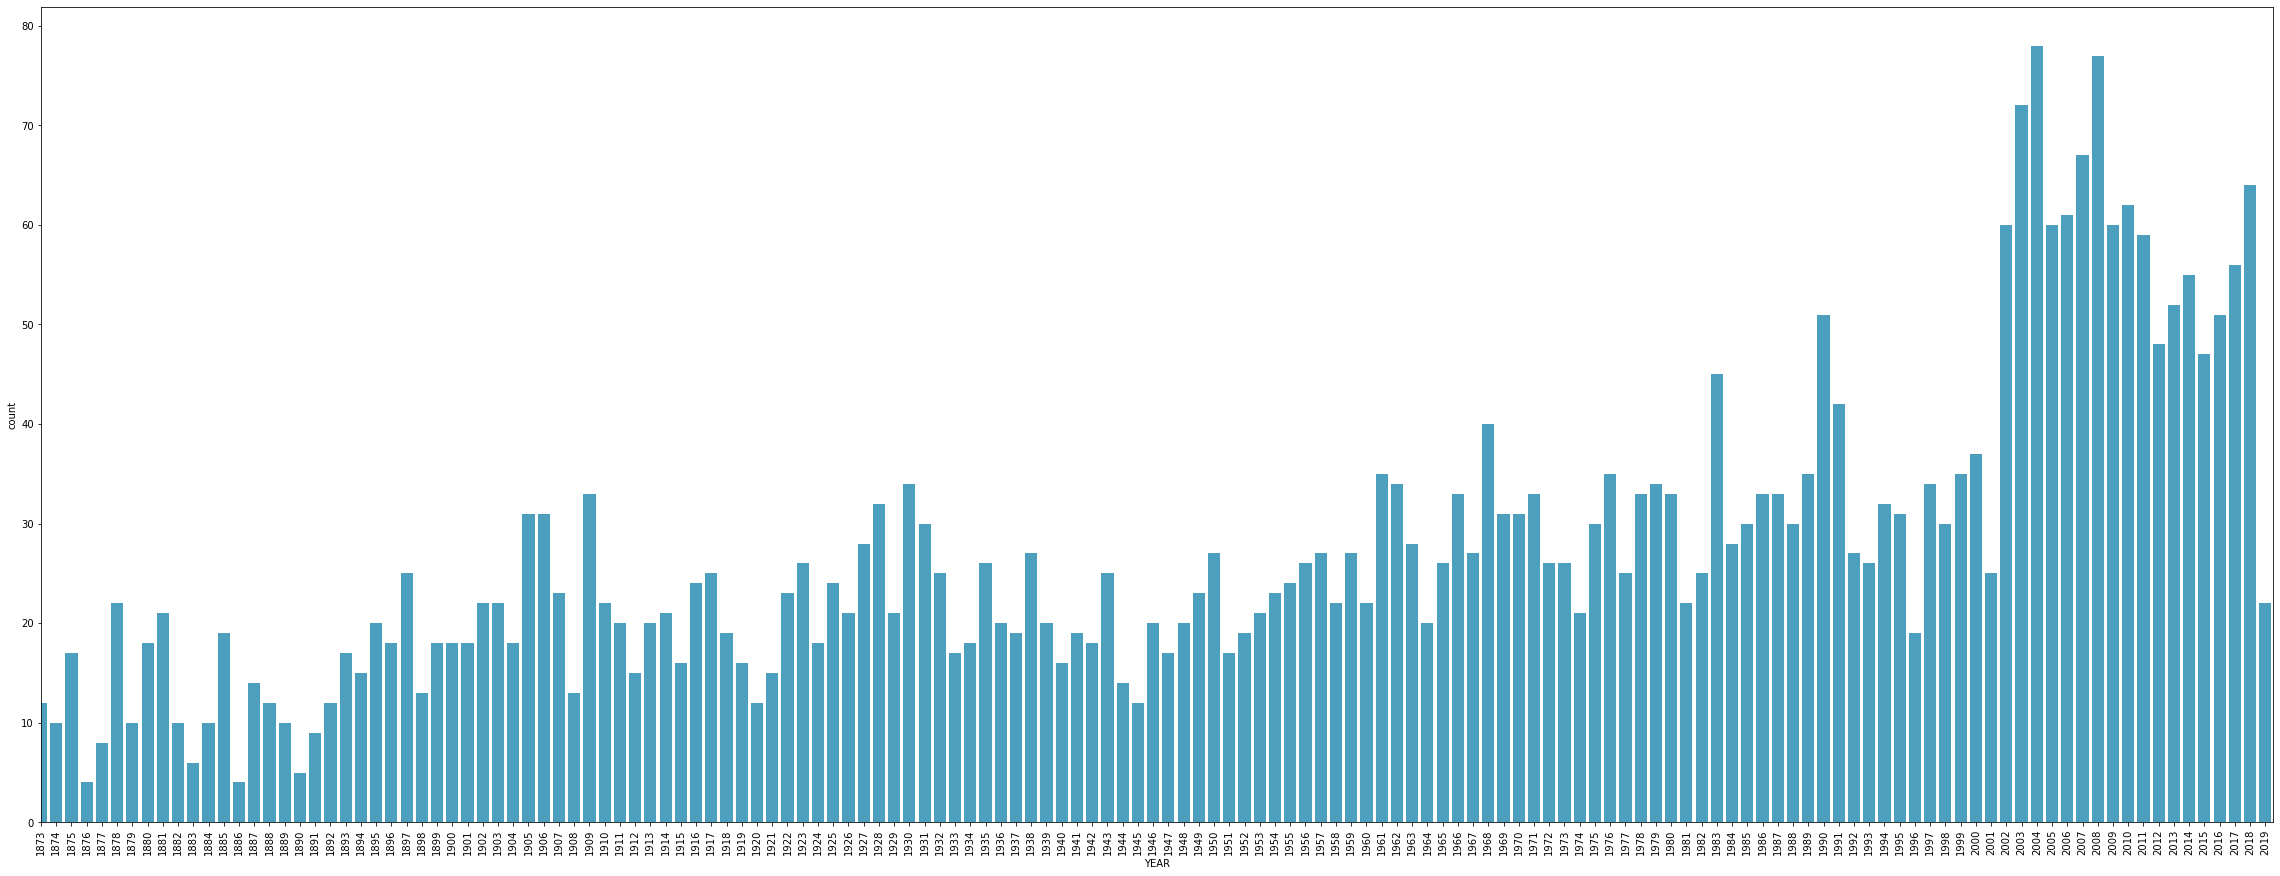

In [427]:
plt.figure(figsize=[40,15])
g = sns.countplot(data=df, x="YEAR", color = sns.color_palette("husl", 8)[5])
g.set(xlim=(800.0, None))
g.set_xticklabels(g.get_xticklabels(),rotation = 90);

NICE

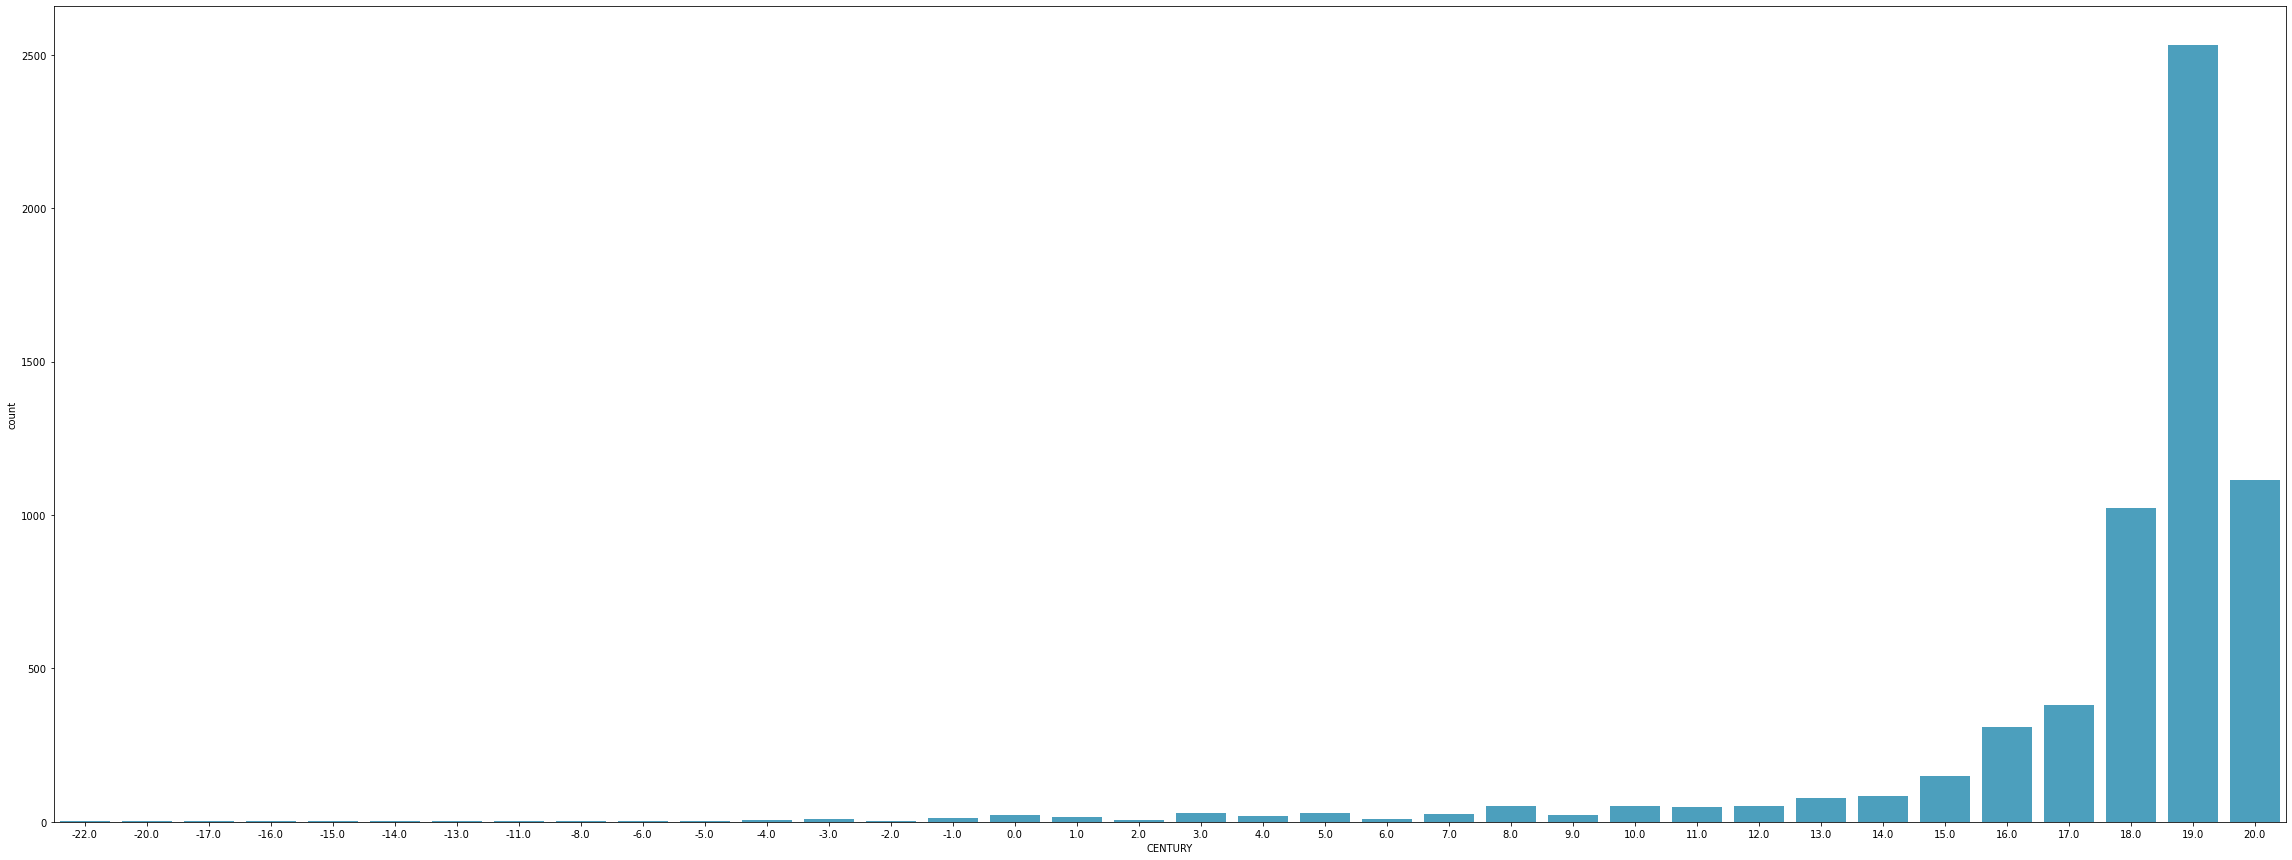

In [210]:
plt.figure(figsize=[40,15])
g = sns.countplot(data=df, x="CENTURY", color = sns.color_palette("husl", 8)[5])
#g.set(xlim=(25.0, None))

In [12]:
print(df.nunique())

I_D                                   6105
FLAG_TSUNAMI                             1
YEAR                                   947
MONTH                                   12
DAY                                     31
HOUR                                    24
MINUTE                                  61
SECOND                                 577
FOCAL_DEPTH                            199
EQ_PRIMARY                              65
EQ_MAG_MW                               55
EQ_MAG_MS                               56
EQ_MAG_MB                               48
EQ_MAG_ML                               49
EQ_MAG_MFA                              15
EQ_MAG_UNK                              53
INTENSITY                               12
COUNTRY                                156
STATE                                   29
LATITUDE                              2921
LONGITUDE                             3693
REGION_CODE                             18
DEATHS                                 416
DEATHS_DESC

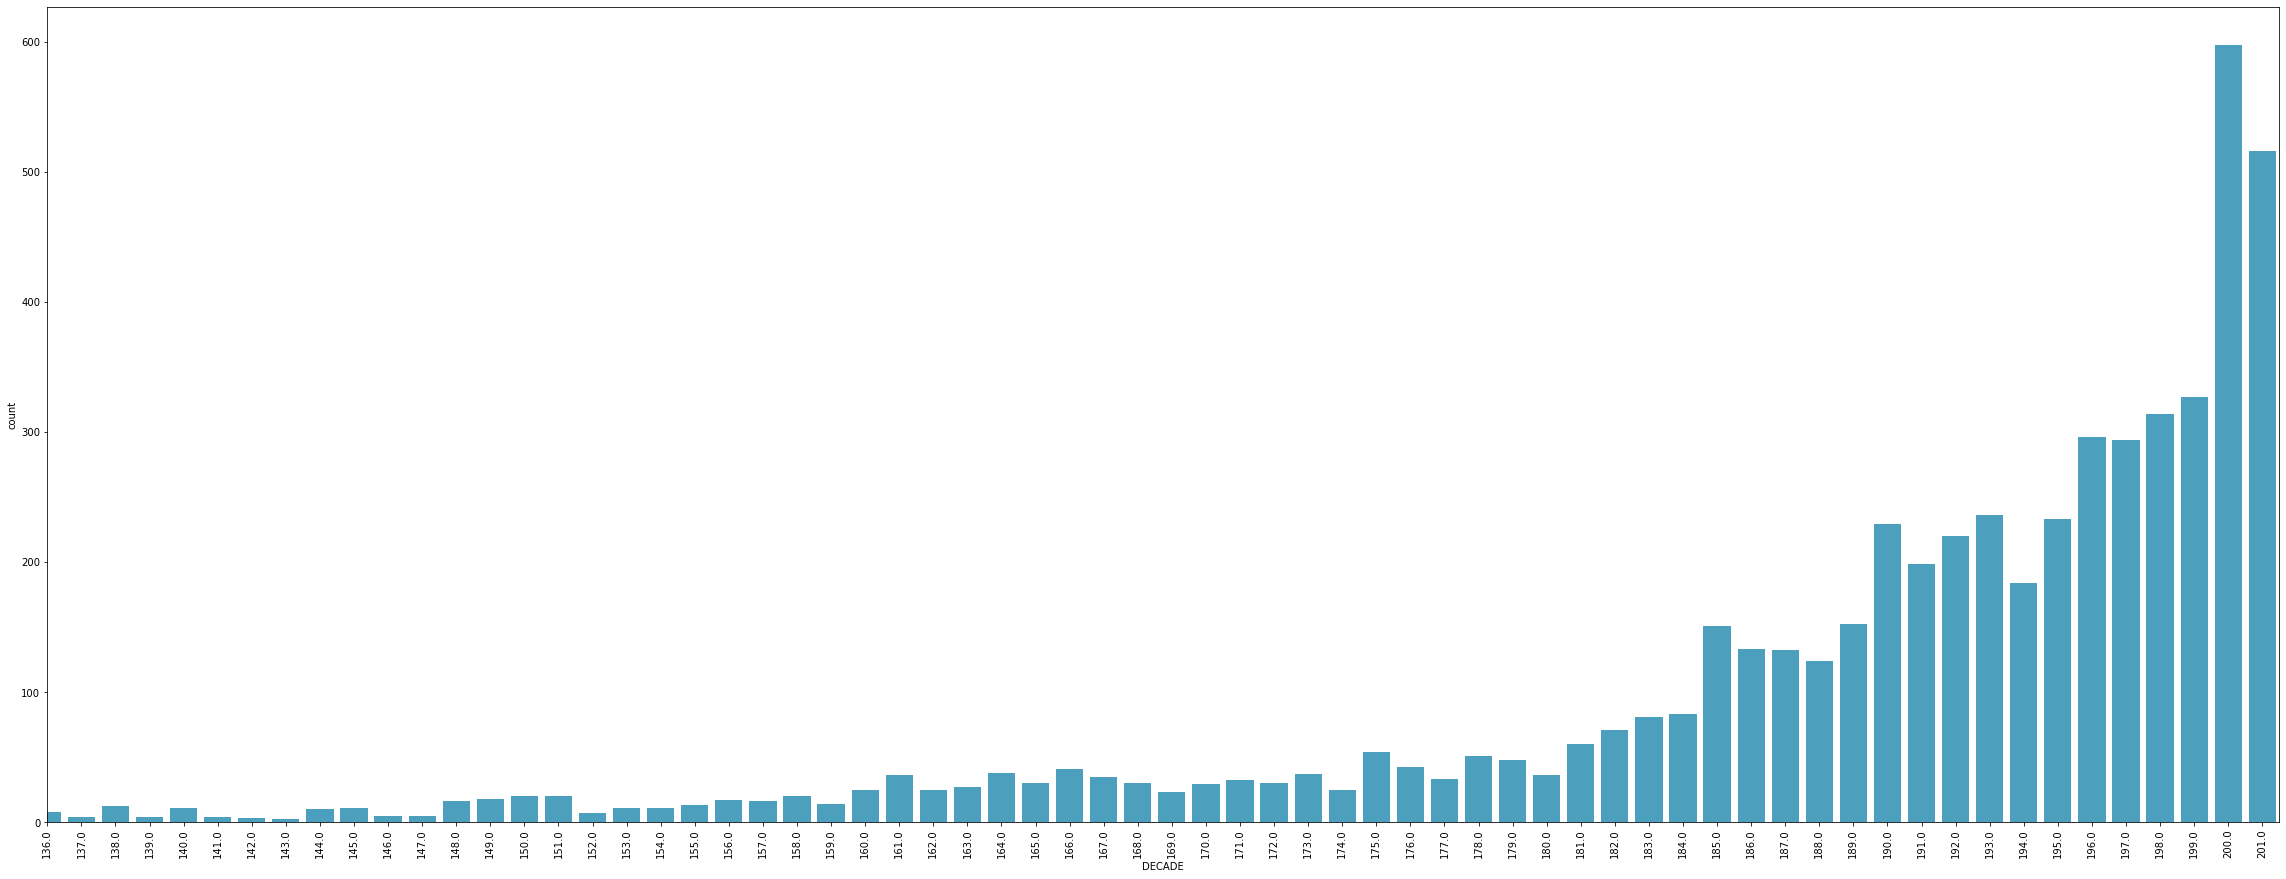

In [217]:
plt.figure(figsize=[40,15])
g = sns.countplot(data=df, x="DECADE", color = sns.color_palette("husl", 8)[5])
g.set(xlim=(150.0, None))
g.set_xticklabels(g.get_xticklabels(),rotation = 90);

<Figure size 2880x1080 with 0 Axes>

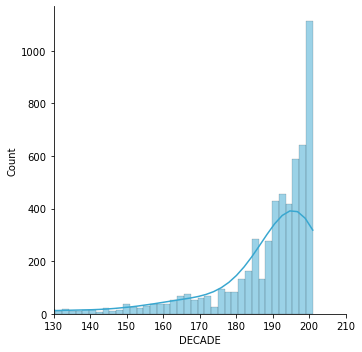

In [14]:
plt.figure(figsize=[40,15])
g = sns.displot(data=df, x="DECADE", kde=True, color = sns.color_palette("husl", 8)[5])  #, x ='mag', kde = True) # , *col=’row_z’ )
g.set(xlim=(130.0, 210.0))

Decision to concentrate of a subset of the data using only magType = "ml".
magType = "ml" has the most datapoints and works on the Richter Scale.

magType = "md" might also be interesting for a historic comparison, it is about the duration of an earthquake.

magType = "mb" and other Types (too few datasets, less comparable) will not be considered in this analysis

See: https://www.usgs.gov/natural-hazards/earthquake-hazards/science/magnitude-types?qt-science_center_objects=0#qt-science_center_objects

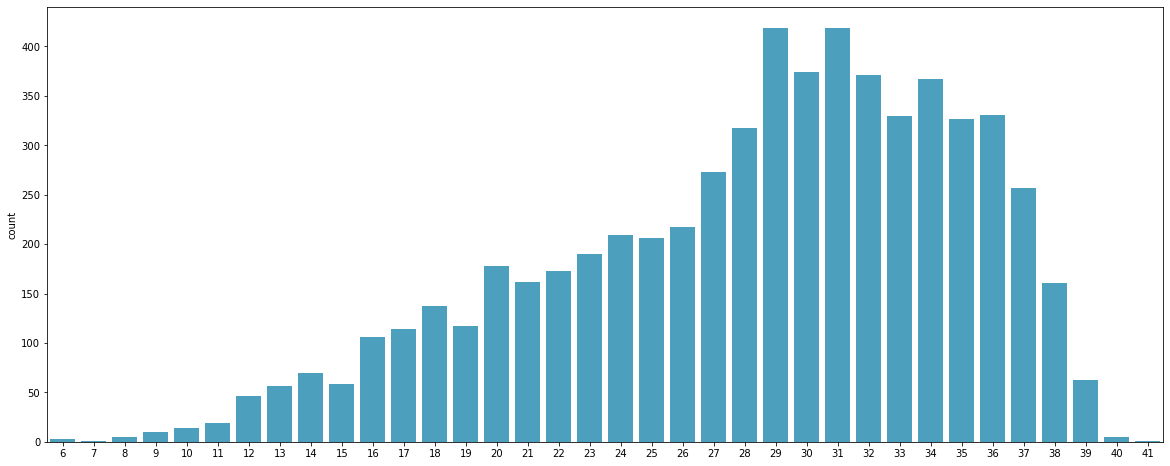

In [17]:
df_nan_col_sum = df.isna().sum(axis=1)
plt.figure(figsize=[20, 8])
ax = sns.countplot(x=df_nan_col_sum, color = sns.color_palette("husl", 8)[5])
ax.set_xticklabels(ax.get_xticklabels());

In [18]:
more_missing_cols = set(df.columns[df.isnull().mean() >= 0.30])
print(more_missing_cols)

half_missing_cols = set(df.columns[df.isnull().mean() < 0.50])
print(half_missing_cols)

thirty_missing_cols = set(df.columns[df.isnull().mean() < 0.30])
print(thirty_missing_cols)

onepct_missing_cols = set(df.columns[df.isnull().mean() < 0.01])
print(onepct_missing_cols)

ninetyninepct_missing_cols = set(df.columns[df.isnull().mean() >= 0.01])
print(ninetyninepct_missing_cols)

{'DEATHS_DESCRIPTION', 'FOCAL_DEPTH', 'TOTAL_HOUSES_DAMAGED_DESCRIPTION', 'INTENSITY', 'MISSING', 'TOTAL_HOUSES_DESTROYED_DESCRIPTION', 'HOUR', 'TOTAL_MISSING', 'HOUSES_DESTROYED_DESCRIPTION', 'DAMAGE_MILLIONS_DOLLARS', 'EQ_MAG_MW', 'EQ_MAG_MFA', 'HOUSES_DAMAGED_DESCRIPTION', 'MINUTE', 'DEATHS', 'EQ_MAG_MS', 'HOUSES_DESTROYED', 'EQ_MAG_MB', 'EQ_MAG_UNK', 'TOTAL_HOUSES_DAMAGED', 'TOTAL_INJURIES_DESCRIPTION', 'HOUSES_DAMAGED', 'TOTAL_INJURIES', 'STATE', 'TOTAL_DEATHS', 'TOTAL_DAMAGE_MILLIONS_DOLLARS', 'INJURIES_DESCRIPTION', 'TOTAL_MISSING_DESCRIPTION', 'TOTAL_DAMAGE_DESCRIPTION', 'SECOND', 'TOTAL_DEATHS_DESCRIPTION', 'FLAG_TSUNAMI', 'EQ_MAG_ML', 'INJURIES', 'TOTAL_HOUSES_DESTROYED', 'MISSING_DESCRIPTION'}
{'FOCAL_DEPTH', 'COUNTRY', 'LATITUDE', 'TSUNAMI', 'HOUR', 'REGION_CODE', 'DECADE', 'I_D', 'MINUTE', 'LONGITUDE', 'DAY', 'EQ_PRIMARY', 'DAMAGE_DESCRIPTION', 'CENTURY', 'MONTH', 'TOTAL_DAMAGE_DESCRIPTION', 'SECOND', 'SEVERE', 'YEAR'}
{'CENTURY', 'MONTH', 'DECADE', 'I_D', 'COUNTRY', 'LATI

* Focal Depth (km) - The depth of the earthquake is given in kilometers.
* EQ primary - Magnitude of the Earthquake
* Damage Description - Description of Damage from the Earthquake. Valid values: 0 to 4
For those events not offering a monetary evaluation of damage, the following five-level scale was used to classify damage (1990 dollars) and was listed in the Damage column. If the actual dollar amount of damage was listed, a descriptor was also added for search purposes.
0	NONE
1	LIMITED (roughly corresponding to less than $1 million)
2	MODERATE (~$1 to $5 million)
3	SEVERE (~$5 to $25 million)
4	EXTREME (~$25 million or more) 
When possible, a rough estimate was made of the dollar amount of damage based upon the description provided, in order to choose the damage category. In many cases, only a single descriptive term was available. These terms were converted to the damage categories based upon the authors apparent use of the term elsewhere. In the absence of other information, LIMITED is considered synonymous with slight, minor, and light, SEVERE as synonymous with major, extensive, and heavy, and EXTREME as synonymous with catastrophic.
Note: The descriptive terms relate approximately to current dollar values.

Decision:
* Drop all columns except thirty_missing_cols
* Drop all rows with NaNs in thirty_missing cols

In [428]:
df_less_cols = df.drop(more_missing_cols, axis=1).copy()
df_less_cols = df_less_cols.drop(['I_D', 'DAY' ], axis=1).copy()

print(df_less_cols)

      YEAR  MONTH  EQ_PRIMARY           COUNTRY LATITUDE LONGITUDE  \
0    -2150    NaN         7.3            JORDAN   31.100    35.500   
1    -2000    NaN         7.1      TURKMENISTAN   38.000    58.200   
2    -2000    NaN         NaN             SYRIA   35.683    35.800   
3    -1610    NaN         NaN            GREECE   36.400    25.400   
4    -1566    NaN         NaN            ISRAEL   31.500    35.300   
...    ...    ...         ...               ...      ...       ...   
6100  2019    5.0         7.2  PAPUA NEW GUINEA   -6.977   146.440   
6101  2019    5.0         7.5  PAPUA NEW GUINEA   -4.081   152.569   
6102  2019    5.0         4.8             CHINA   45.205   124.611   
6103  2019    5.0         3.2       NETHERLANDS   53.394     6.586   
6104  2019    5.0         8.0              PERU   -5.796   -75.298   

      REGION_CODE  DAMAGE_DESCRIPTION  DECADE  CENTURY  TSUNAMI  SEVERE  
0           140.0                 3.0    -215      -22        0       2  
1          

Decision:
* Drop all columns except onepct_missing_cols
* Drop all rows with NaNs in onepct_missing cols

In [429]:
df_lesser_cols = df.drop(ninetyninepct_missing_cols, axis=1).copy()
df_lesser_cols = df_lesser_cols.drop(['I_D'], axis=1).copy()

print(df_lesser_cols)

      YEAR           COUNTRY LATITUDE LONGITUDE  REGION_CODE  DECADE  CENTURY  \
0    -2150            JORDAN   31.100    35.500        140.0    -215      -22   
1    -2000      TURKMENISTAN   38.000    58.200         40.0    -200      -20   
2    -2000             SYRIA   35.683    35.800        130.0    -200      -20   
3    -1610            GREECE   36.400    25.400        130.0    -161      -17   
4    -1566            ISRAEL   31.500    35.300        140.0    -157      -16   
...    ...               ...      ...       ...          ...     ...      ...   
6100  2019  PAPUA NEW GUINEA   -6.977   146.440        170.0     201       20   
6101  2019  PAPUA NEW GUINEA   -4.081   152.569        170.0     201       20   
6102  2019             CHINA   45.205   124.611         30.0     201       20   
6103  2019       NETHERLANDS   53.394     6.586          NaN     201       20   
6104  2019              PERU   -5.796   -75.298        160.0     201       20   

      TSUNAMI  SEVERE  
0  

<Figure size 2880x1080 with 0 Axes>

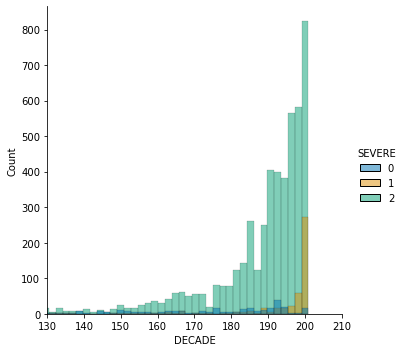

In [430]:
#plt.figure(figsize=[20, 8])
#sns.countplot(data=df_lesser_cols, x=df_lesser_cols['DECADE'],  hue="SEVERE")
#(df_lesser_cols['COUNTRY'].value_counts()[:15]/df.shape[0]).sort_index(ascending=False).plot(kind="barh");

plt.figure(figsize=[40,15])
g = sns.displot(data=df_lesser_cols, x="DECADE", hue="SEVERE",  palette=sns.color_palette("colorblind", 3))  #, x ='mag', kde = True) # , *col=’row_z’ )
g.set(xlim=(130.0, 210.0))

In [431]:
df_dropped  = df_less_cols.dropna()

In [432]:
print(df_dropped)

      YEAR  MONTH  EQ_PRIMARY           COUNTRY LATITUDE LONGITUDE  \
16    -426    6.0         7.1            GREECE   38.900    22.700   
32    -193    2.0         6.5             CHINA   35.400   103.900   
36     -63   10.0         6.4            RUSSIA   45.200    36.600   
43     -31    9.0         7.0            ISRAEL   32.000    35.500   
57      46   10.0         6.5             CHINA   33.000   112.500   
...    ...    ...         ...               ...      ...       ...   
6099  2019    4.0         6.1       PHILIPPINES   14.924   120.497   
6100  2019    5.0         7.2  PAPUA NEW GUINEA   -6.977   146.440   
6101  2019    5.0         7.5  PAPUA NEW GUINEA   -4.081   152.569   
6102  2019    5.0         4.8             CHINA   45.205   124.611   
6104  2019    5.0         8.0              PERU   -5.796   -75.298   

      REGION_CODE  DAMAGE_DESCRIPTION  DECADE  CENTURY  TSUNAMI  SEVERE  
16          130.0                 3.0     -43       -5        1       2  
32         

[(80.0, 113.5)]

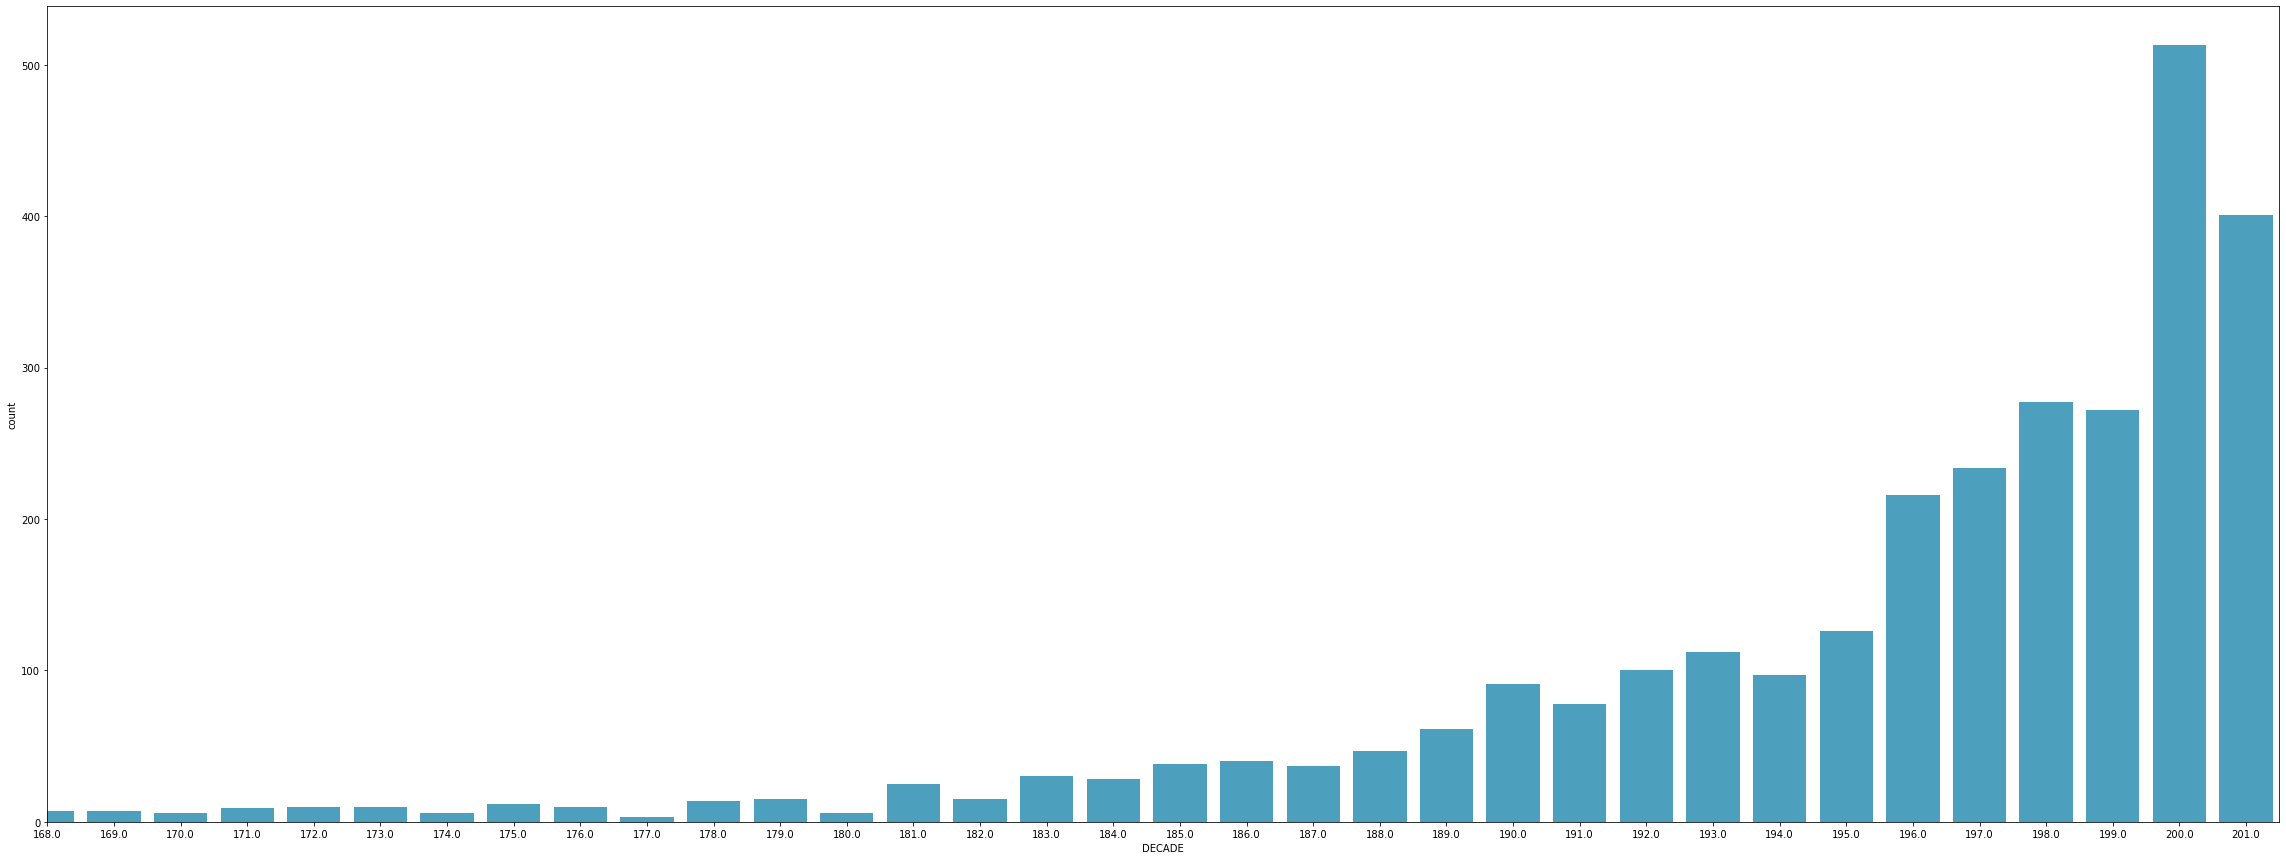

In [236]:
plt.figure(figsize=[40,15])
g = sns.countplot(data=df_dropped, x="DECADE", color = sns.color_palette("husl", 8)[5])
g.set(xlim=(80.0, None))

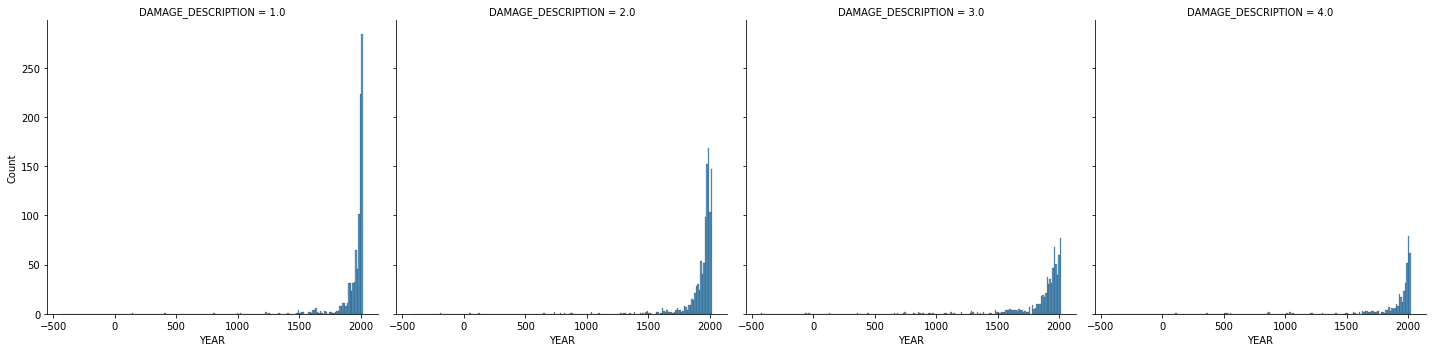

In [146]:
sns.displot(data=df_dropped, x='YEAR', col='DAMAGE_DESCRIPTION')

In [433]:
df_dam4 = df_dropped[df_dropped['DAMAGE_DESCRIPTION']==4].copy()

In [434]:
print(df_dam4)

      YEAR  MONTH  EQ_PRIMARY    COUNTRY  LATITUDE LONGITUDE  REGION_CODE  \
73     115   12.0         7.5     TURKEY    36.100    36.100        140.0   
114    365    7.0         8.0     GREECE    35.000    23.000        130.0   
143    512    5.0         7.5      CHINA    39.400   113.300         30.0   
148    525    5.0         7.0     TURKEY    36.250    36.100        140.0   
150    528   11.0         7.1     TURKEY    36.250    36.100        140.0   
...    ...    ...         ...        ...       ...       ...          ...   
6056  2018    8.0         6.9  INDONESIA    -8.287   116.452         60.0   
6065  2018    9.0         6.6      JAPAN    42.671   141.933         30.0   
6070  2018    9.0         7.5  INDONESIA     -.178   119.840        170.0   
6077  2018   11.0         7.0        USA    61.340  -149.937        150.0   
6082  2018   12.0         5.1      ITALY    37.555    15.166        130.0   

      DAMAGE_DESCRIPTION  DECADE  CENTURY  TSUNAMI  SEVERE  
73            

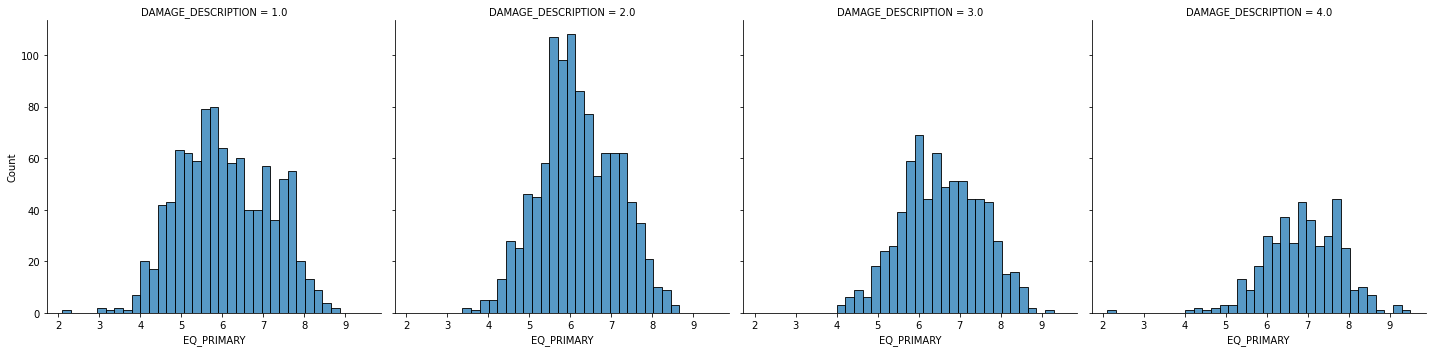

In [147]:
sns.displot(data=df_dropped, x='EQ_PRIMARY', col='DAMAGE_DESCRIPTION')

In [435]:
df_EQGT5 = df_dropped[df_dropped['EQ_PRIMARY']>5.0].copy()
df_EQGT55 = df_dropped[df_dropped['EQ_PRIMARY']>5.5].copy()
df_EQGT6 = df_dropped[df_dropped['EQ_PRIMARY']>6.0].copy()
df_EQGT65 = df_dropped[df_dropped['EQ_PRIMARY']>6.5].copy()
df_EQGT7 = df_dropped[df_dropped['EQ_PRIMARY']>7.0].copy()
df_EQGT8 = df_dropped[df_dropped['EQ_PRIMARY']>8.0].copy()

In [436]:
print(df_EQGT7)

      YEAR  MONTH  EQ_PRIMARY           COUNTRY  LATITUDE LONGITUDE  \
16    -426    6.0         7.1            GREECE    38.900    22.700   
73     115   12.0         7.5            TURKEY    36.100    36.100   
114    365    7.0         8.0            GREECE    35.000    23.000   
129    447    1.0         7.3            TURKEY    40.900    28.500   
143    512    5.0         7.5             CHINA    39.400   113.300   
...    ...    ...         ...               ...       ...       ...   
6070  2018    9.0         7.5         INDONESIA     -.178   119.840   
6091  2019    2.0         7.5           ECUADOR    -2.199   -77.023   
6100  2019    5.0         7.2  PAPUA NEW GUINEA    -6.977   146.440   
6101  2019    5.0         7.5  PAPUA NEW GUINEA    -4.081   152.569   
6104  2019    5.0         8.0              PERU    -5.796   -75.298   

      REGION_CODE  DAMAGE_DESCRIPTION  DECADE  CENTURY  TSUNAMI  SEVERE  
16          130.0                 3.0     -43       -5        1       2  

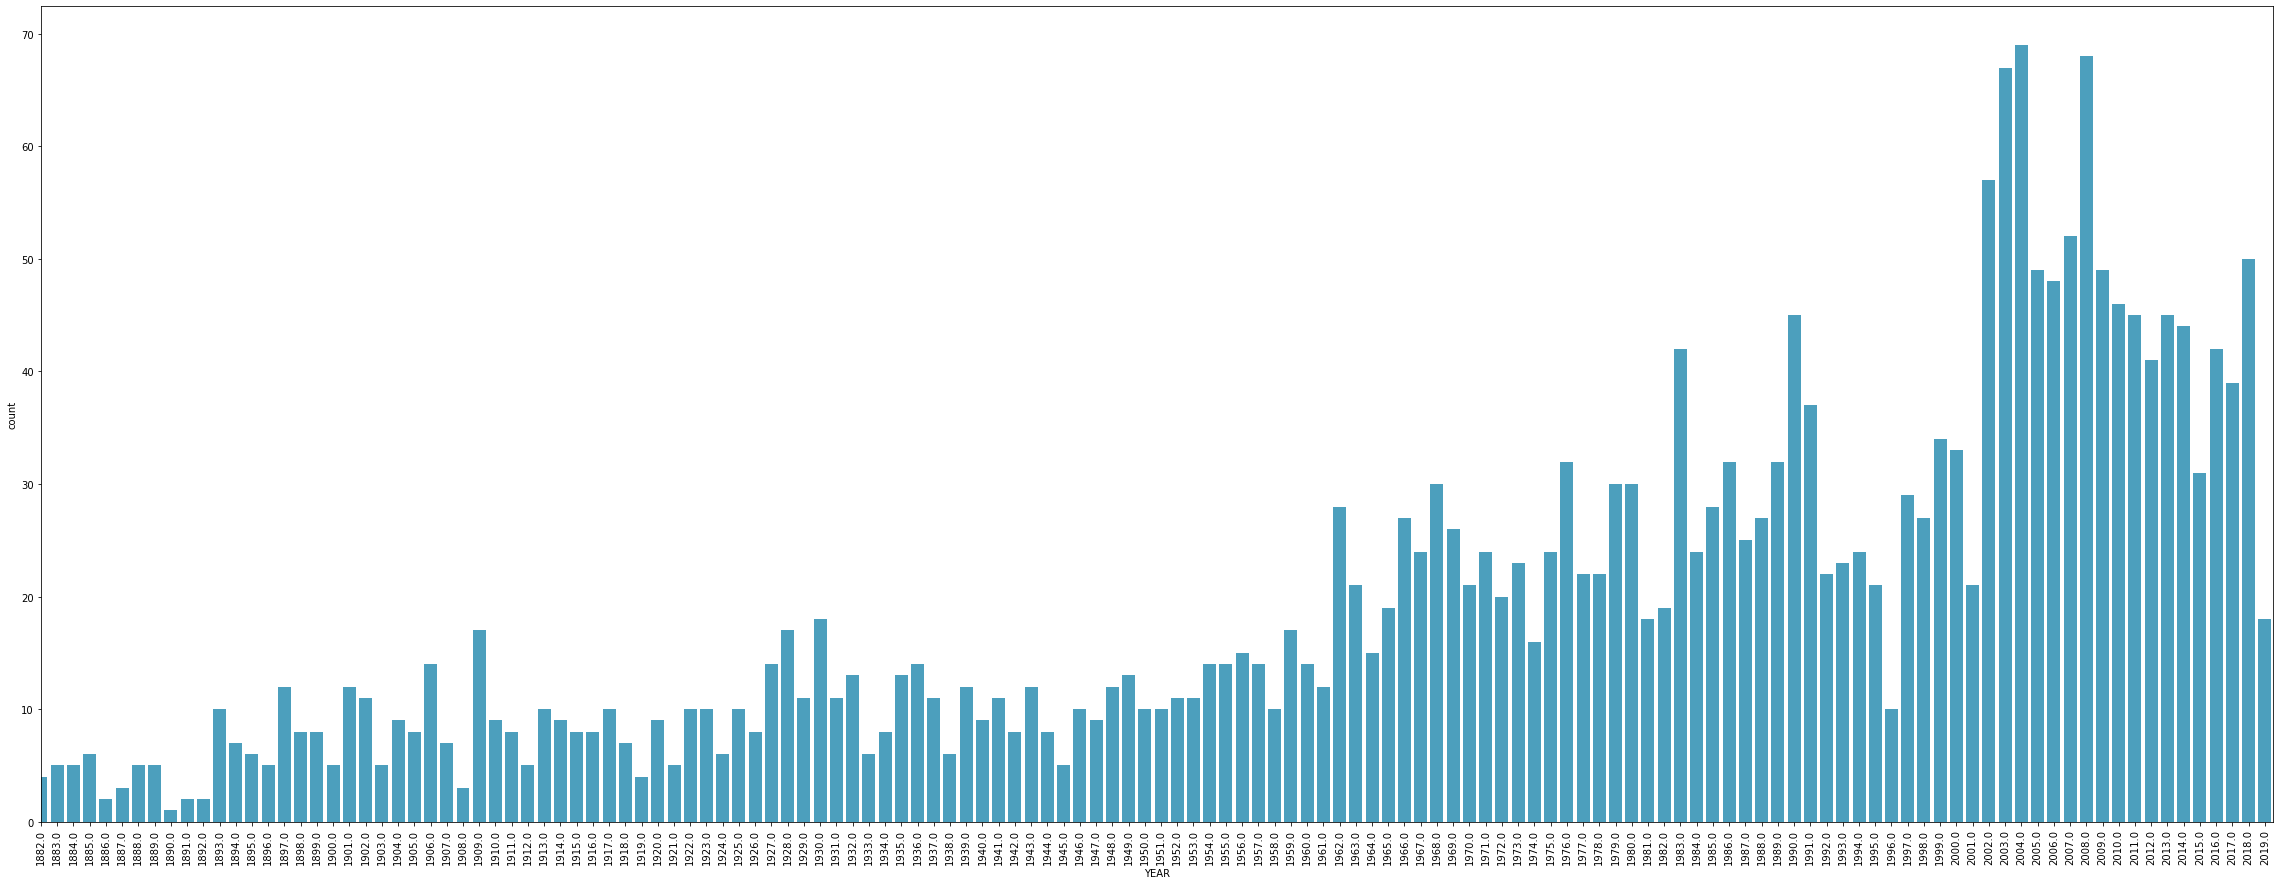

In [244]:
plt.figure(figsize=[40,15])

g = sns.countplot(data=df_dropped, x="YEAR", color = sns.color_palette("husl", 8)[5])
g.set(xlim=(320.0, None))
g.set_xticklabels(g.get_xticklabels(),rotation = 90);

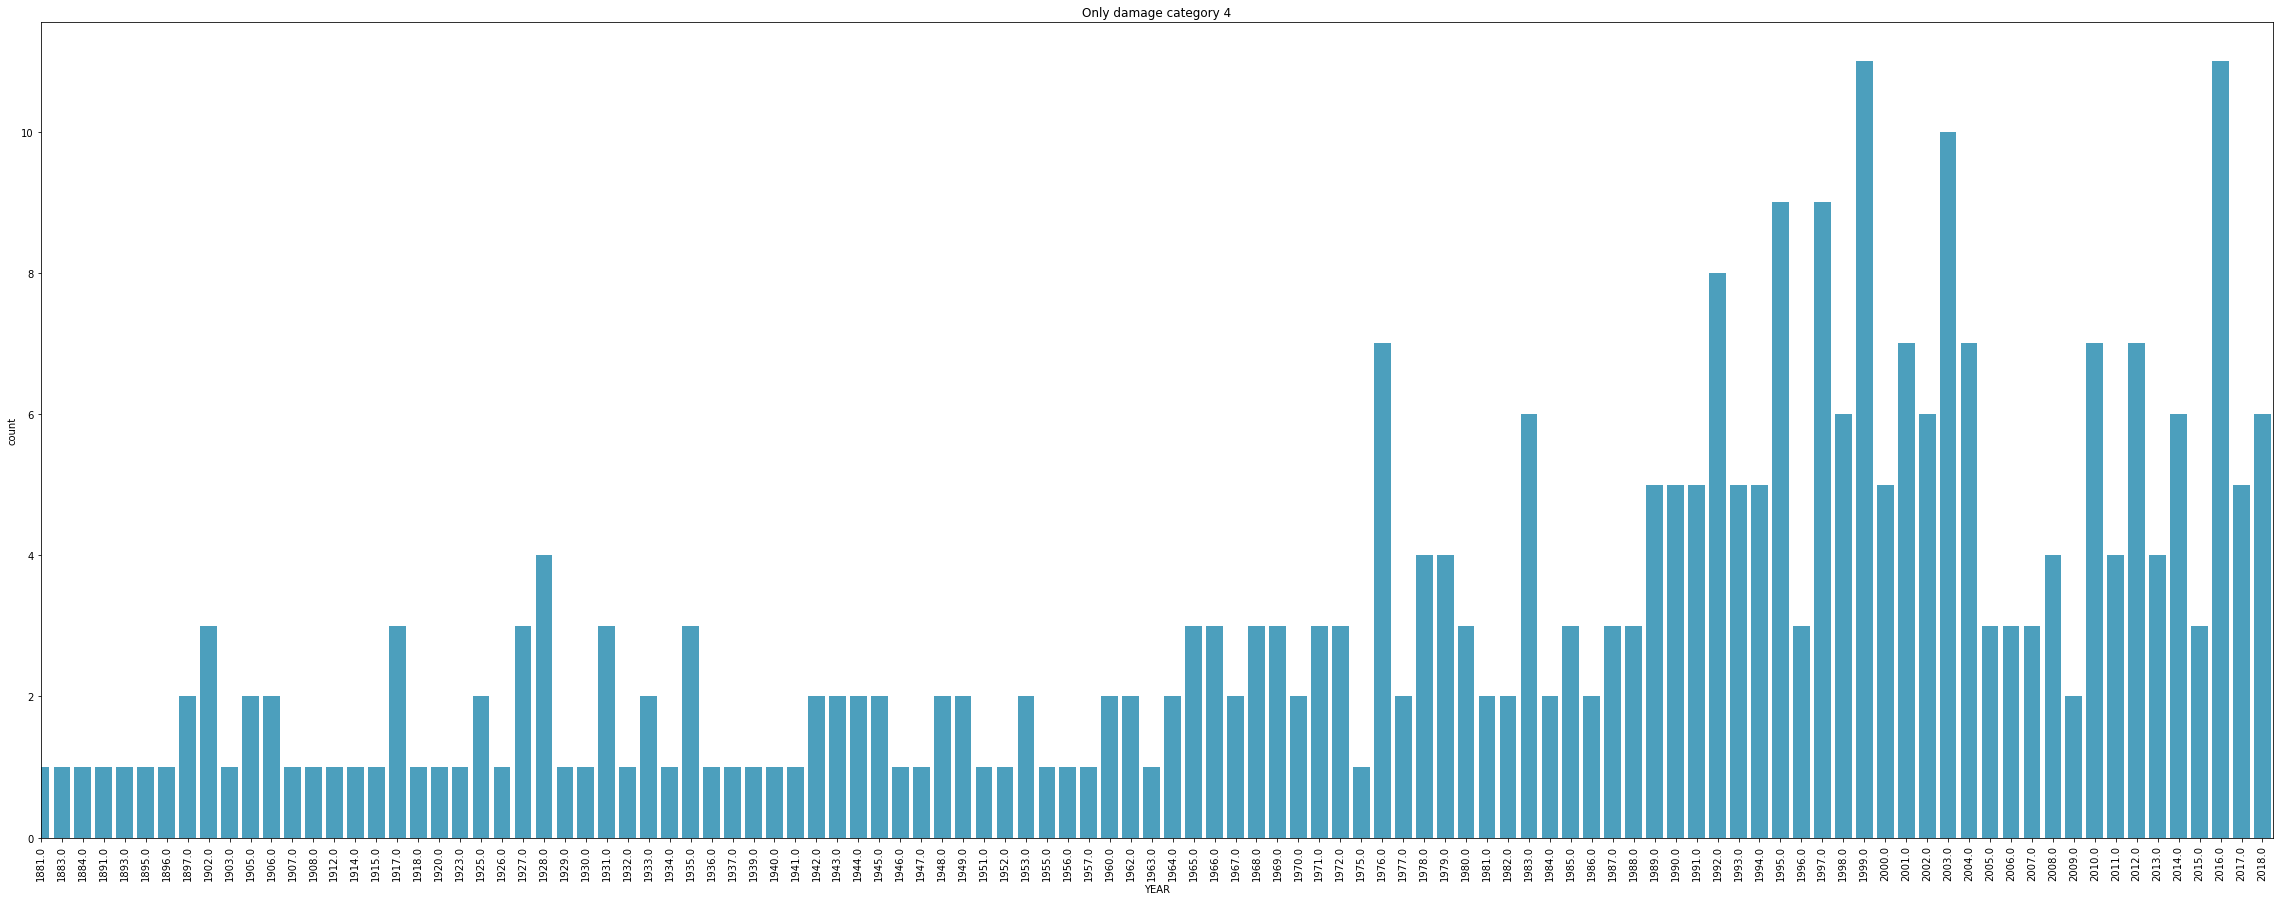

In [251]:
plt.figure(figsize=[40,15])
g = sns.countplot(data=df_dam4, x="YEAR", color = sns.color_palette("husl", 8)[5])
g.set(xlim=(81.0, None))
g.set(title="Only damage category 4")
g.set_xticklabels(g.get_xticklabels(),rotation = 90);

<Figure size 2880x1080 with 0 Axes>

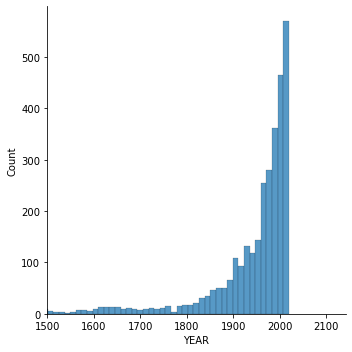

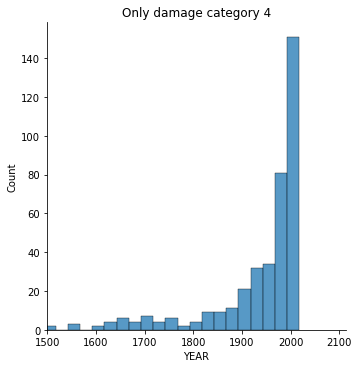

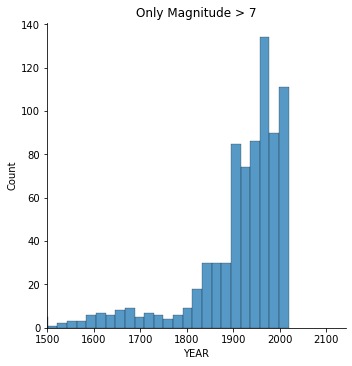

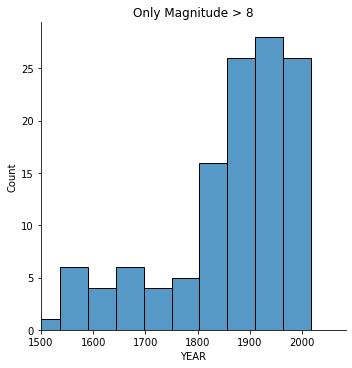

In [255]:
plt.figure(figsize=[40,15])

ax = sns.displot(data=df_dropped, x='YEAR')
ax.set(xlim=(1500.0, None))

ax = sns.displot(data=df_dam4, x='YEAR')
ax.set(xlim=(1500.0, None))
ax.set(title="Only damage category 4")

ax = sns.displot(data=df_EQGT7, x='YEAR')
ax.set(xlim=(1500.0, None))
ax.set(title="Only Magnitude > 7")

ax = sns.displot(data=df_EQGT8, x='YEAR')
ax.set(xlim=(1500.0, None))
ax.set(title="Only Magnitude > 8")

[(1900.0, 2020.0)]

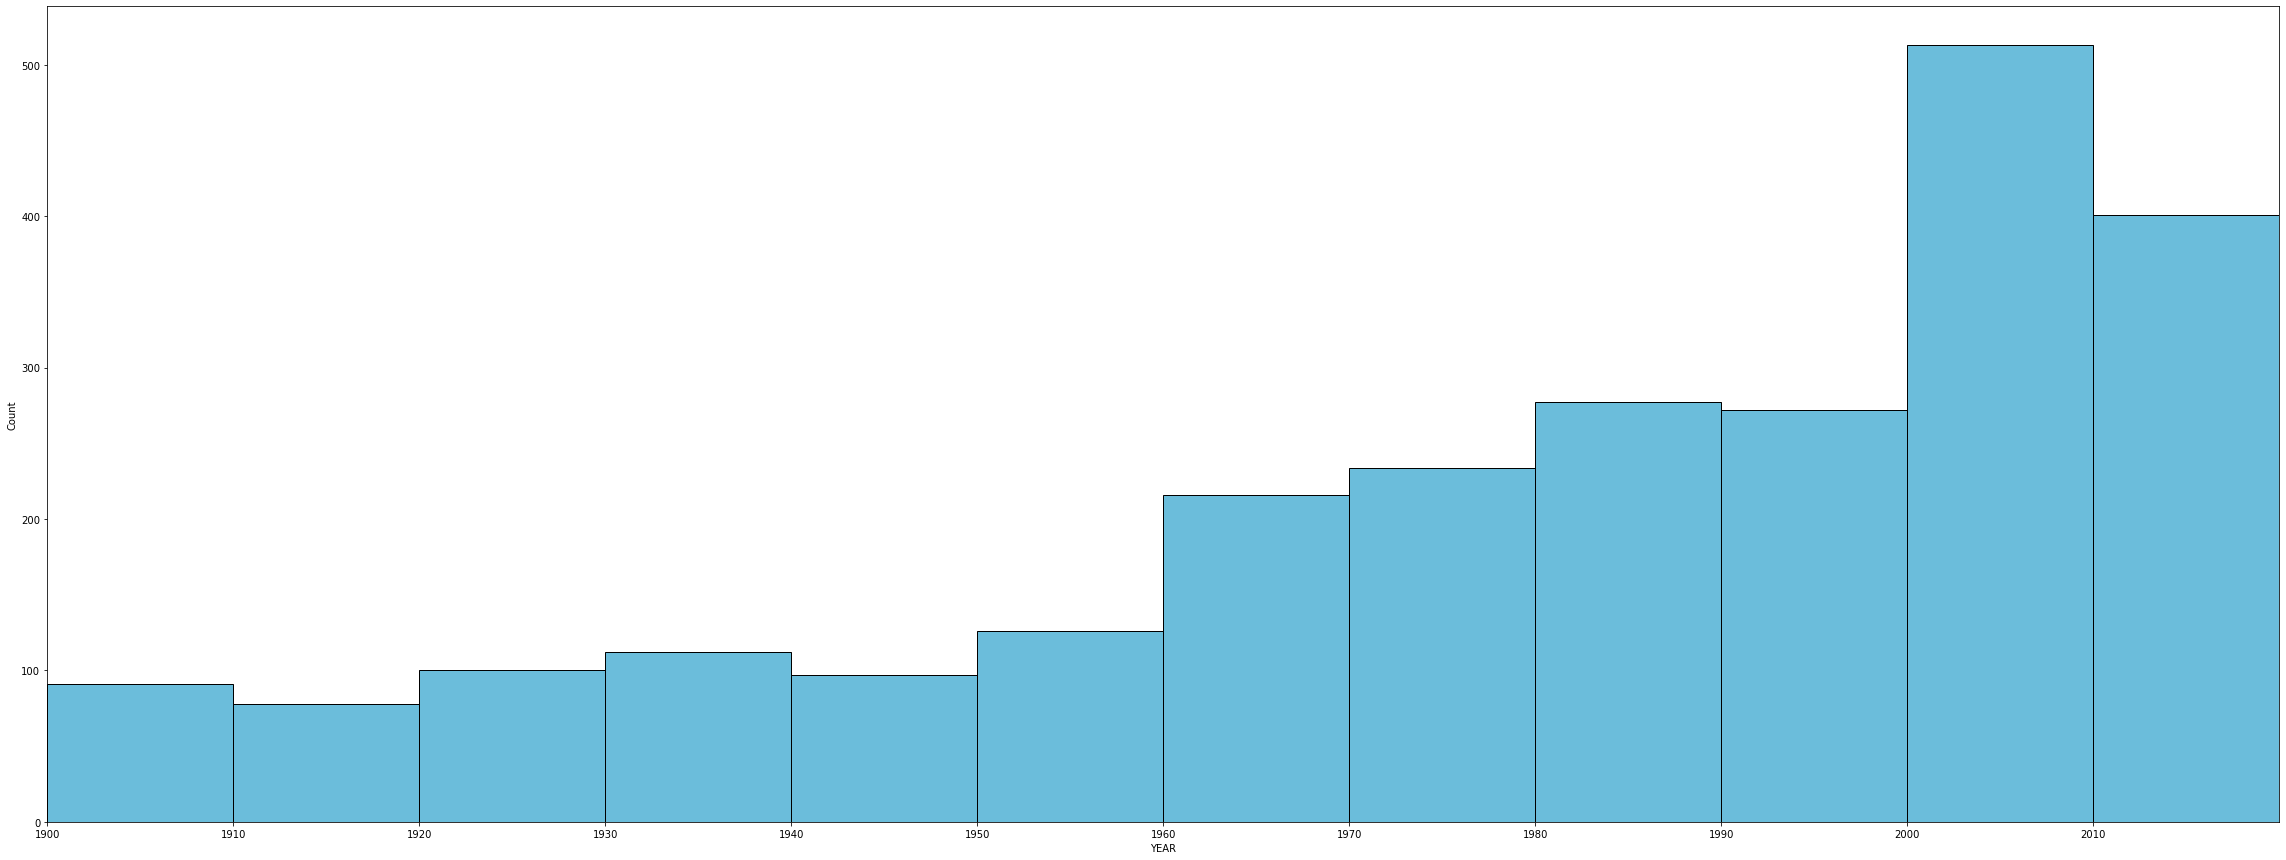

In [289]:
plt.figure(figsize=[40,15])

ax = sns.histplot(data=df_dropped, x='YEAR', 
                  binwidth=10, binrange=(1900,2020),
                  color = sns.color_palette("husl", 8)[5])
ax.set_xticks(np.arange(1900, 2020, 10))
ax.set(xlim=(1900.0, 2020))

[Text(0.5, 1.0, 'Only damage category 4')]

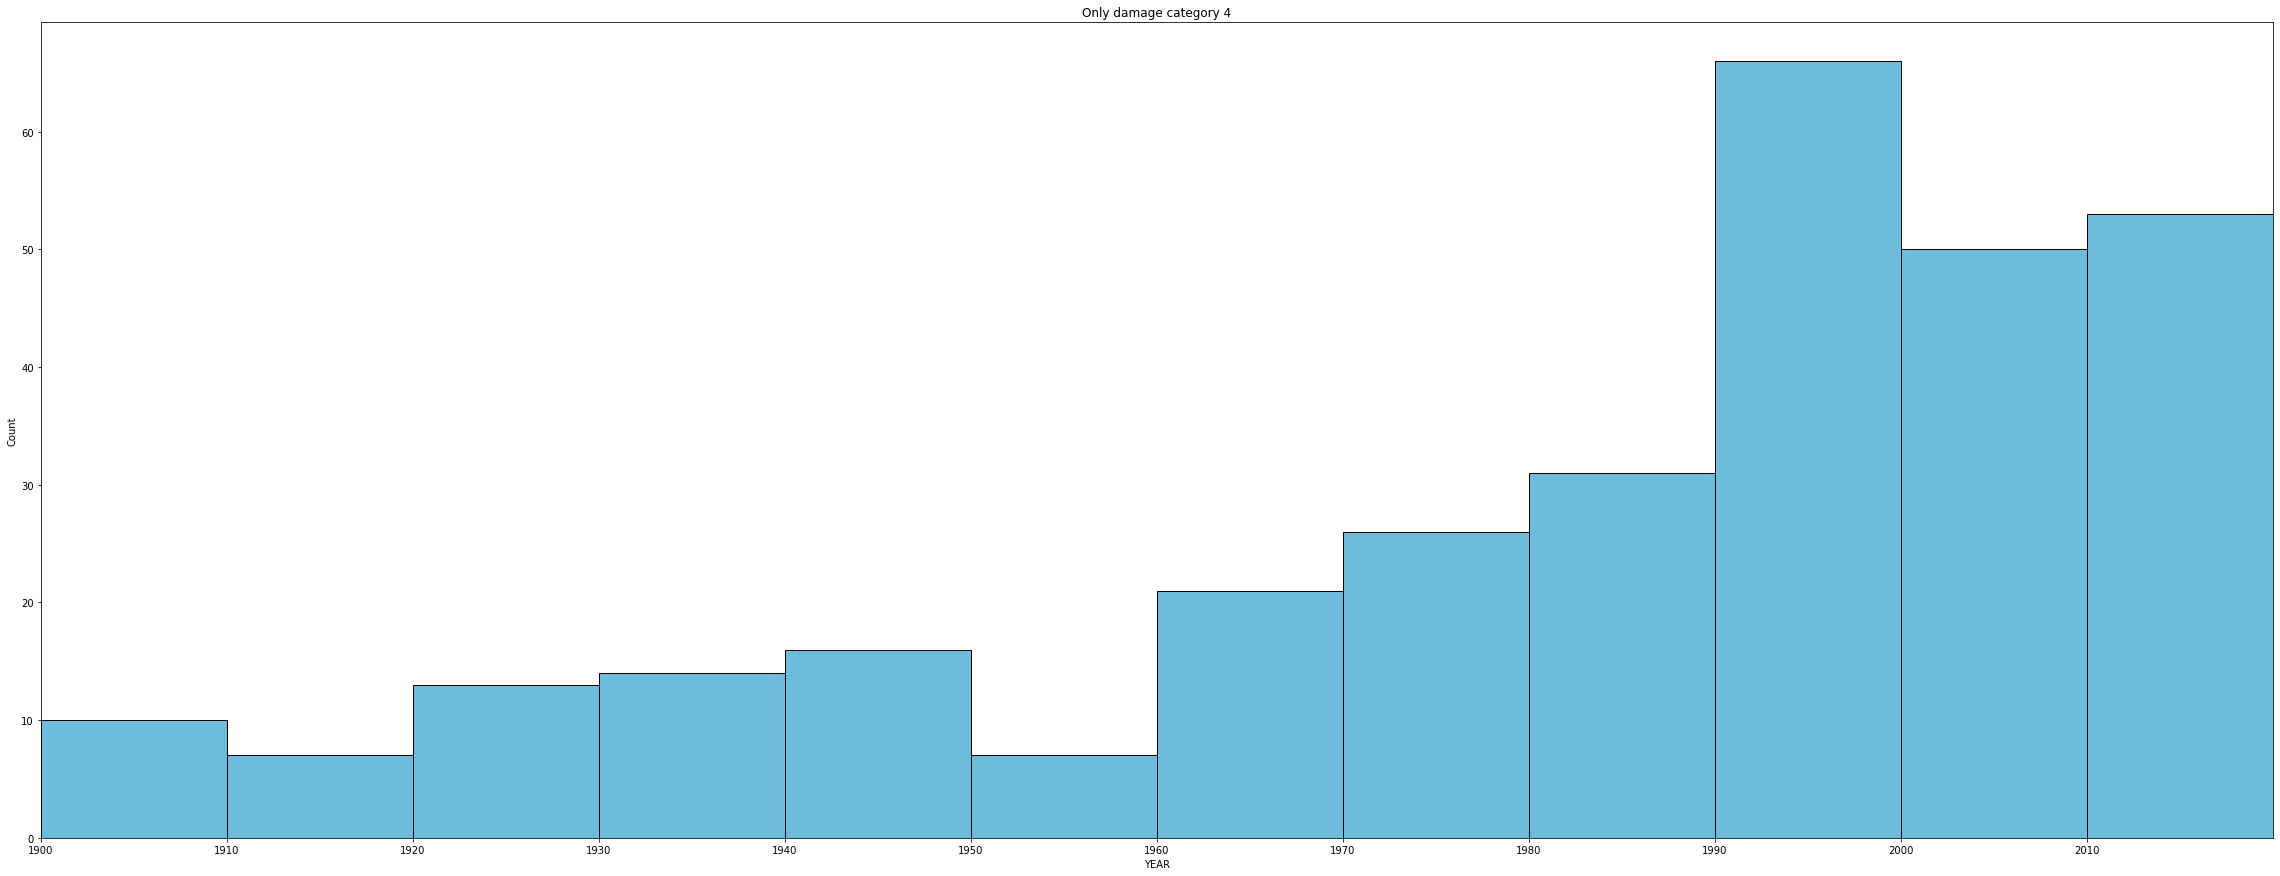

In [279]:
plt.figure(figsize=[40,15])

ax = sns.histplot(data=df_dam4, x='YEAR', 
                  binwidth=10, binrange=(1900,2020),
                  color = sns.color_palette("husl", 8)[5])
ax.set(xlim=(1900.0, 2020))
ax.set_xticks(np.arange(1900, 2020, 10))
ax.set(title="Only damage category 4")

[Text(0.5, 1.0, 'Only Magnitude > 6.5')]

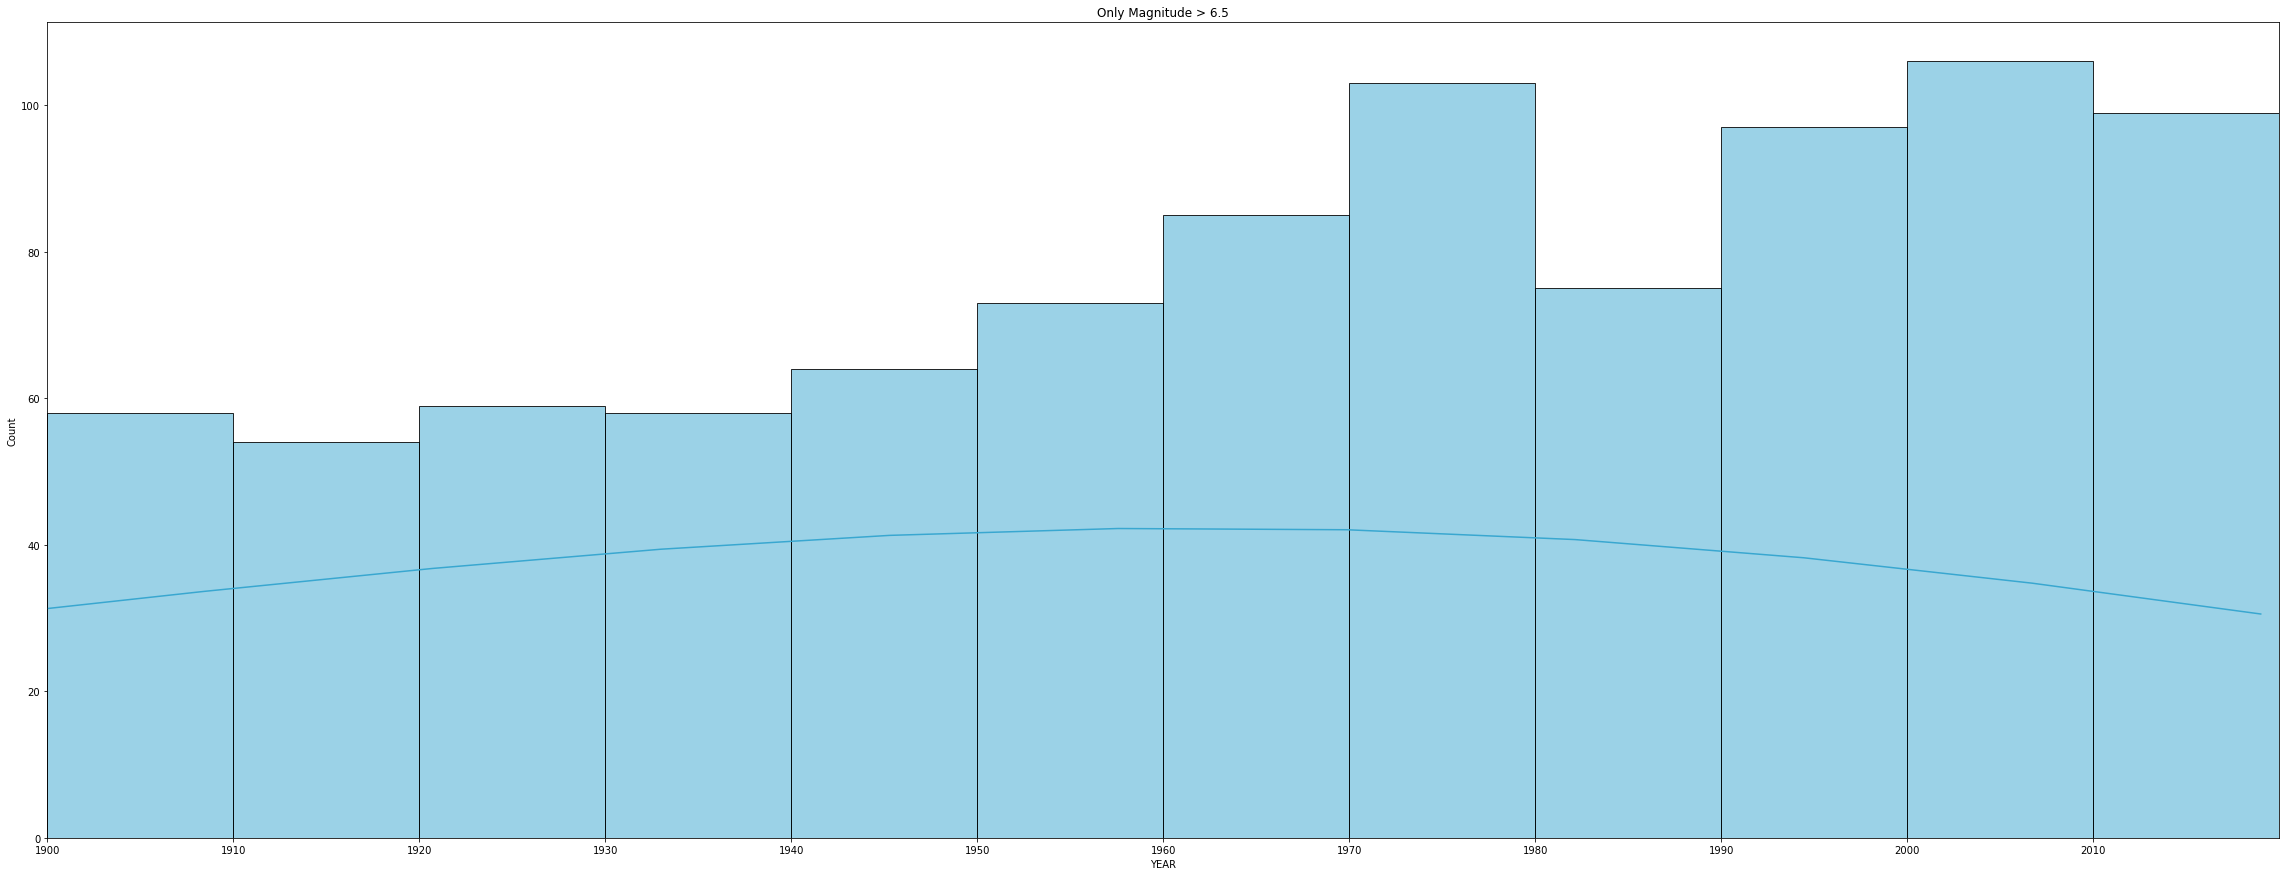

In [303]:
plt.figure(figsize=[40,15])

ax = sns.histplot(data=df_EQGT65, x='YEAR', 
                  binwidth=10, binrange=(1900,2020), kde=True,
                  color = sns.color_palette("husl", 8)[5])
ax.set(xlim=(1900.0, 2020))
ax.set_xticks(np.arange(1900, 2020, 10))
ax.set(title="Only Magnitude > 6.5")

[Text(0.5, 1.0, 'Only Magnitude > 7')]

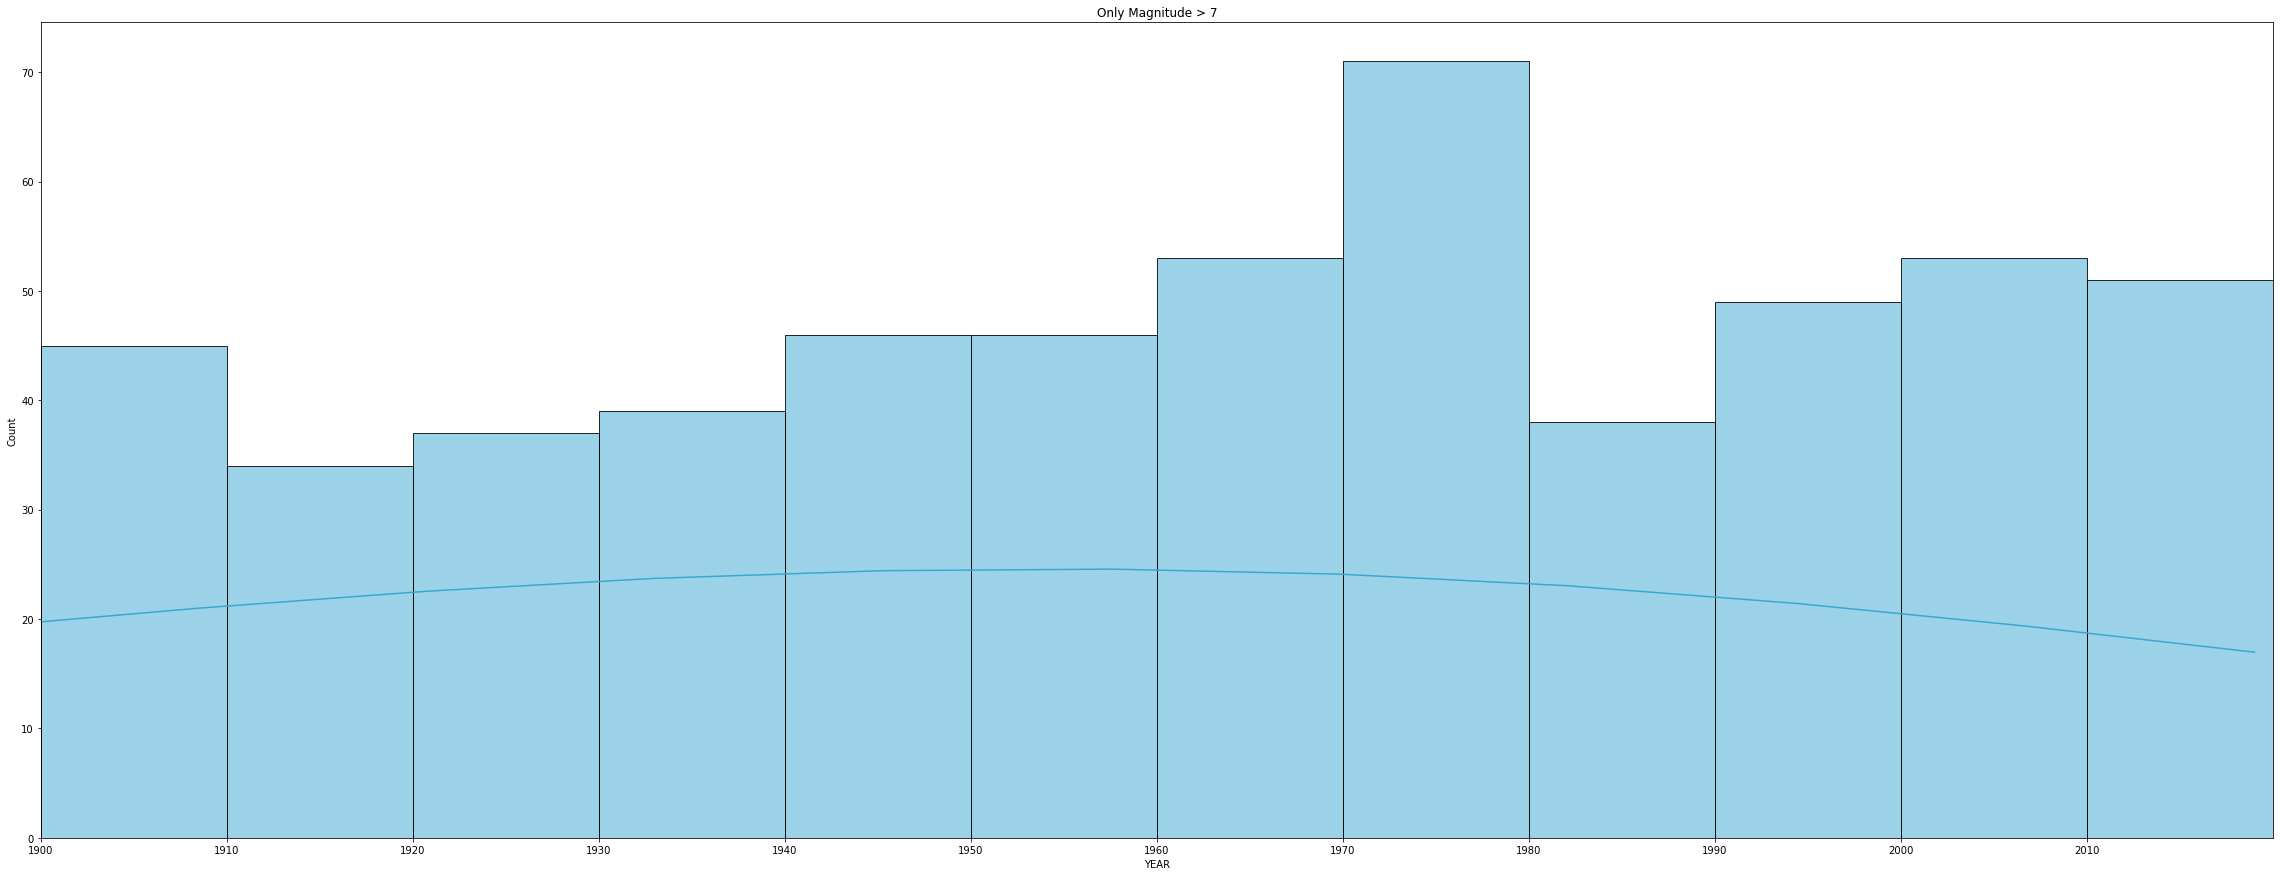

In [296]:
plt.figure(figsize=[40,15])

ax = sns.histplot(data=df_EQGT7, x='YEAR', 
                  binwidth=10, binrange=(1900,2020), kde=True,
                  color = sns.color_palette("husl", 8)[5])
ax.set(xlim=(1900.0, 2020))
ax.set_xticks(np.arange(1900, 2020, 10))
ax.set(title="Only Magnitude > 7")

[Text(0.5, 1.0, 'Only Magnitude > 8')]

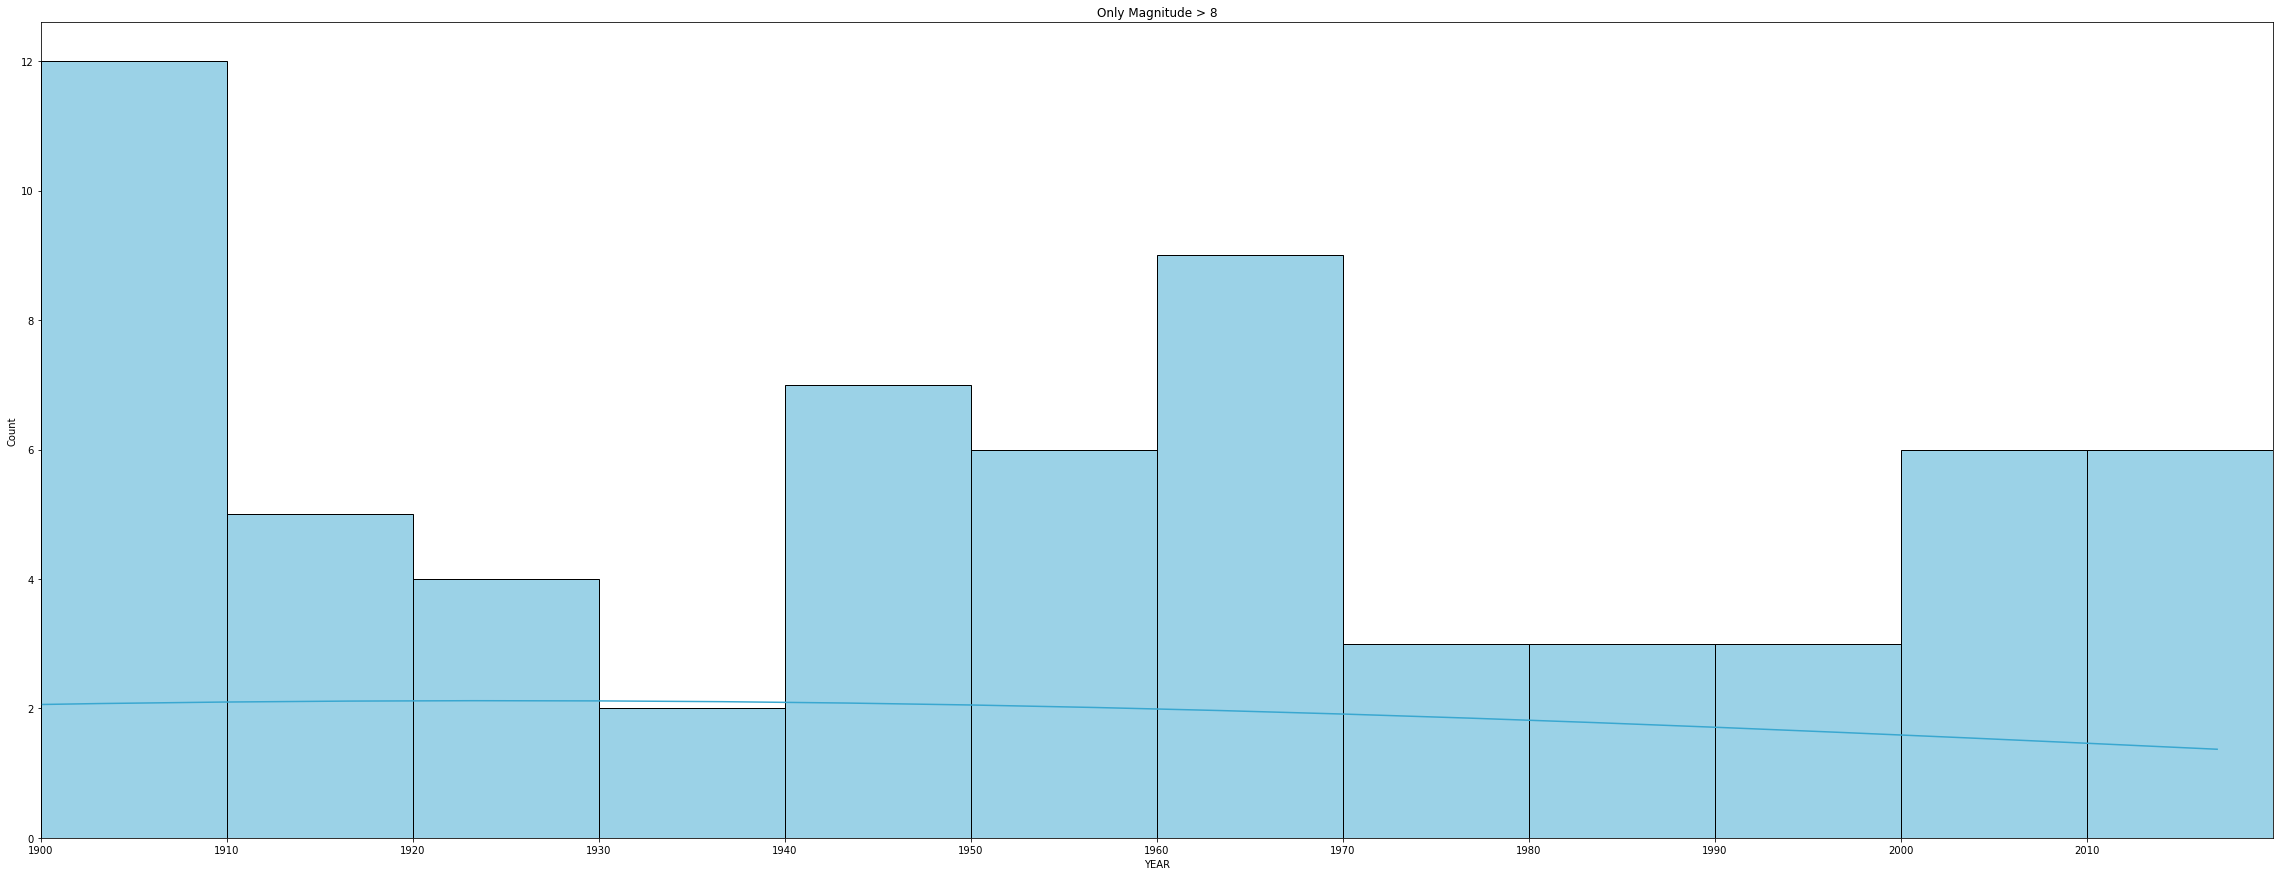

In [297]:
plt.figure(figsize=[40,15])

ax = sns.histplot(data=df_EQGT8, x='YEAR', 
                  binwidth=10, binrange=(1900,2020), kde=True,
                  color = sns.color_palette("husl", 8)[5])
ax.set(xlim=(1900.0, 2020))
ax.set_xticks(np.arange(1900, 2020, 10))
ax.set(title="Only Magnitude > 8")

<Figure size 2880x1080 with 0 Axes>

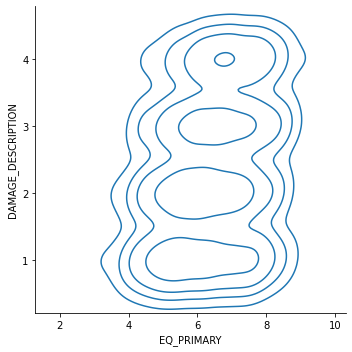

In [61]:
plt.figure(figsize=[40,15])

sns.displot(data=df_dropped, x='EQ_PRIMARY', y='DAMAGE_DESCRIPTION', kind='kde', levels=[.01, .04, .125, .5])

In [388]:
df_geo = df.dropna(subset=['LONGITUDE', 'LATITUDE'], axis=0, how='any').copy()

df_geo.LONGITUDE = df_geo.LONGITUDE.str.strip()
#print(df_geo.LONGITUDE)
df_geo.LATITUDE = df_geo.LATITUDE.str.strip()
#print(df_geo.LATITUDE)

values_lng=[]
values_lat=[]
for  val_lng, val_lat in zip(df_geo['LONGITUDE'], df_geo['LATITUDE']):
    try:
        print(val_lng, float(val_lng))
        values_lng.append(float(val_lng))
    except Exception: 
        values_lng.append(np.NaN)
    try:
        print(val_lat, float(val_lat))
        values_lat.append(float(val_lat))
    except Exception: 
        values_lat.append(np.NaN)

values_lng = pd.Series(values_lng)
df_geo['LONGITUDE'] = values_lng
values_lat = pd.Series(values_lat)
df_geo['LATITUDE'] = values_lat

df_geo = df_geo.dropna(subset=['LONGITUDE', 'LATITUDE']).copy()
print(df_geo.LONGITUDE, df_geo.LATITUDE)

35.500 35.5
31.100 31.1
58.200 58.2
38.000 38.0
35.800 35.8
35.683 35.683
25.400 25.4
36.400 36.4
35.300 35.3
31.500 31.5
25.500 25.5
35.500 35.5
35.800 35.8
35.683 35.683
35.500 35.5
32.000 32.0
35.000 35.0
29.600 29.6
35.500 35.5
33.000 33.0
35.220 35.22
33.270 33.27
22.500 22.5
37.000 37.0
35.370 35.37
33.560 33.56
23.500 23.5
37.900 37.9
23.300 23.3
39.700 39.7
22.500 22.5
37.000 37.0
22.700 22.7
38.900 38.9
51.800 51.8
35.500 35.5
22.250 22.25
38.250 38.25
25.000 25.0
35.000 35.0
25.000 25.0
40.000 40.0
71.000 71.0
23.000 23.0
22.500 22.5
38.500 38.5
27.000 27.0
41.000 41.0
77.500 77.5
42.700 42.7
28.300 28.3
36.300 36.3
25.500 25.5
29.200 29.2
-7.170 -7.17
36.200 36.2
8.500 8.5
44.300 44.3
-10.500 -10.5
36.000 36.0
25.396 25.396
36.404 36.404
103.900 103.9
35.400 35.4
105.600 105.6
33.800 33.8
119.000 119.0
36.300 36.3
36.600 36.6
45.200 45.2
-10.000 -10.0
36.000 36.0
19.500 19.5
41.300 41.3
41.000 41.0
43.000 43.0
28.500 28.5
43.500 43.5
104.700 104.7
34.900 34.9
34.200 34.2
31.

102.700 102.7
30.100 30.1
13.000 13.0
42.800 42.8
15.004 15.004
37.734 37.734
135.200 135.2
33.700 33.7
56.200 56.2
26.600 26.6
59.700 59.7
34.700 34.7
115.700 115.7
40.400 40.4
35.500 35.5
34.300 34.3
111.300 111.3
29.000 29.0
34.300 34.3
44.300 44.3
139.500 139.5
41.000 41.0
15.000 15.0
44.000 44.0
105.800 105.8
34.900 34.9
28.300 28.3
40.800 40.8
37.956 37.956
36.527 36.527
51.700 51.7
32.600 32.6
-9.000 -9.0
38.000 38.0
11.300 11.3
43.800 43.8
7.600 7.6
47.500 47.5
118.200 118.2
36.900 36.9
13.500 13.5
46.400 46.4
13.500 13.5
42.300 42.3
43.000 43.0
43.000 43.0
113.000 113.0
37.300 37.3
105.300 105.3
35.600 35.6
12.100 12.1
43.500 43.5
27.000 27.0
40.800 40.8
36.400 36.4
35.100 35.1
-9.000 -9.0
36.800 36.8
7.600 7.6
47.400 47.4
43.200 43.2
14.100 14.1
3.000 3.0
36.800 36.8
136.200 136.2
33.400 33.4
55.900 55.9
26.800 26.8
15.600 15.6
40.300 40.3
135.000 135.0
33.000 33.0
115.300 115.3
28.800 28.8
3.000 3.0
36.800 36.8
49.700 49.7
37.300 37.3
112.500 112.5
37.600 37.6
118.800 118.8


57.500 57.5
37.200 37.2
27.100 27.1
38.400 38.4
48.600 48.6
40.600 40.6
-77.500 -77.5
18.300 18.3
125.500 125.5
25.000 25.0
46.200 46.2
38.000 38.0
-71.050 -71.05
42.350 42.35
68.000 68.0
24.000 24.0
27.100 27.1
38.400 38.4
118.600 118.6
35.300 35.3
126.000 126.0
38.000 38.0
48.600 48.6
40.600 40.6
15.000 15.0
37.600 37.6
11.400 11.4
47.200 47.2
122.500 122.5
33.000 33.0
126.500 126.5
35.900 35.9
141.000 141.0
35.500 35.5
53.600 53.6
27.500 27.5
48.600 48.6
40.600 40.6
134.700 134.7
33.400 33.4
12.583 12.583
43.933 43.933
26.000 26.0
40.000 40.0
25.500 25.5
36.500 36.5
-69.500 -69.5
18.300 18.3
127.520 127.52
1.375 1.375
128.000 128.0
-3.000 -3.0
59.300 59.3
36.300 36.3
127.520 127.52
1.375 1.375
20.000 20.0
39.500 39.5
127.750 127.75
-3.750 -3.75
128.200 128.2
-3.700 -3.7
-79.000 -79.0
-1.700 -1.7
121.000 121.0
13.000 13.0
132.000 132.0
34.500 34.5
144.000 144.0
40.000 40.0
104.800 104.8
33.400 33.4
141.500 141.5
35.000 35.0
120.500 120.5
14.500 14.5
-76.500 -76.5
17.600 17.6
50.000 5

41.200 41.2
52.400 52.4
36.300 36.3
-119.700 -119.7
34.400 34.4
-103.800 -103.8
18.900 18.9
12.700 12.7
41.700 41.7
-77.100 -77.1
-12.100 -12.1
7.250 7.25
44.833 44.833
-2.970 -2.97
35.300 35.3
134.800 134.8
33.900 33.9
53.300 53.3
36.300 36.3
50.000 50.0
36.200 36.2
-78.500 -78.5
-.217 -0.217
18.450 18.45
-33.880 -33.88
53.000 53.0
36.300 36.3
143.300 143.3
14.000 14.0
25.000 25.0
35.500 35.5
-16.600 -16.6
28.200 28.2
-111.350 -111.35
26.000 26.0
139.900 139.9
39.900 39.9
-82.200 -82.2
23.800 23.8
45.200 45.2
41.800 41.8
121.300 121.3
25.200 25.2
100.300 100.3
31.700 31.7
123.900 123.9
13.100 13.1
-71.670 -71.67
-33.080 -33.08
-90.400 -90.4
35.600 35.6
-90.400 -90.4
35.600 35.6
-89.600 -89.6
36.300 36.3
-89.600 -89.6
36.500 36.5
83.000 83.0
43.700 43.7
12.450 12.45
41.900 41.9
5.700 5.7
43.700 43.7
-66.900 -66.9
10.600 10.6
5.366 5.366
43.300 43.3
-76.800 -76.8
18.000 18.0
139.600 139.6
35.400 35.4
-117.650 -117.65
34.370 34.37
-119.900 -119.9
34.200 34.2
-75.400 -75.4
-14.100 -14.1
5

106.700 106.7
-6.100 -6.1
28.000 28.0
36.500 36.5
100.100 100.1
26.000 26.0
121.000 121.0
14.500 14.5
6.200 6.2
44.000 44.0
121.000 121.0
14.500 14.5
109.300 109.3
-7.500 -7.5
26.250 26.25
38.250 38.25
168.500 168.5
-19.000 -19.0
141.500 141.5
44.600 44.6
87.600 87.6
43.800 43.8
29.100 29.1
40.500 40.5
47.600 47.6
38.000 38.0
30.550 30.55
38.530 38.53
48.280 48.28
38.250 38.25
57.000 57.0
30.600 30.6
-72.530 -72.53
18.200 18.2
135.000 135.0
-1.000 -1.0
-53.700 -53.7
46.500 46.5
-97.500 -97.5
18.600 18.6
45.980 45.98
33.380 33.38
-77.100 -77.1
-12.000 -12.0
44.260 44.26
33.200 33.2
-122.500 -122.5
38.500 38.5
53.100 53.1
29.600 29.6
110.300 110.3
-7.200 -7.2
15.100 15.1
37.700 37.7
26.200 26.2
39.400 39.4
-124.500 -124.5
41.000 41.0
-121.900 -121.9
37.200 37.2
123.500 123.5
13.250 13.25
-173.500 -173.5
-19.500 -19.5
19.500 19.5
40.400 40.4
-98.000 -98.0
19.000 19.0
25.300 25.3
36.400 36.4
23.000 23.0
36.000 36.0
19.300 19.3
40.300 40.3
85.300 85.3
27.700 27.7
-152.000 -152.0
58.000 58.0

31.500 31.5
122.000 122.0
21.000 21.0
120.600 120.6
17.300 17.3
-70.350 -70.35
-18.500 -18.5
-122.500 -122.5
38.500 38.5
-121.900 -121.9
38.500 38.5
143.300 143.3
14.000 14.0
99.500 99.5
2.500 2.5
166.830 166.83
-15.250 -15.25
127.750 127.75
-3.000 -3.0
136.800 136.8
37.000 37.0
66.200 66.2
30.500 30.5
20.900 20.9
37.700 37.7
25.500 25.5
40.500 40.5
-76.800 -76.8
17.970 17.97
38.300 38.3
38.300 38.3
21.200 21.2
44.200 44.2
20.900 20.9
37.700 37.7
101.800 101.8
36.600 36.6
147.500 147.5
43.300 43.3
145.500 145.5
42.500 42.5
19.700 19.7
40.200 40.2
125.800 125.8
6.900 6.9
168.300 168.3
-17.750 -17.75
16.000 16.0
41.750 41.75
101.500 101.5
30.500 30.5
58.400 58.4
37.200 37.2
82.800 82.8
41.700 41.7
80.300 80.3
41.200 41.2
58.300 58.3
37.100 37.1
126.000 126.0
6.000 6.0
52.300 52.3
29.400 29.4
146.000 146.0
42.500 42.5
23.200 23.2
38.600 38.6
23.100 23.1
38.700 38.7
-71.700 -71.7
8.500 8.5
139.900 139.9
35.700 35.7
126.100 126.1
8.200 8.2
28.700 28.7
40.600 40.6
21.750 21.75
37.750 37.75
1

114.500 114.5
39.800 39.8
120.993 120.993
14.002 14.002
72.800 72.8
38.200 38.2
20.700 20.7
41.100 41.1
57.030 57.03
31.230 31.23
156.000 156.0
51.800 51.8
152.250 152.25
-4.250 -4.25
115.300 115.3
23.000 23.0
-102.500 -102.5
17.500 17.5
130.000 130.0
28.000 28.0
70.500 70.5
36.000 36.0
126.000 126.0
9.000 9.0
.200 0.2
43.200 43.2
137.000 137.0
7.000 7.0
-72.000 -72.0
-20.000 -20.0
-149.000 -149.0
60.500 60.5
15.200 15.2
37.700 37.7
20.500 20.5
40.400 40.4
-100.700 -100.7
17.000 17.0
20.500 20.5
38.000 38.0
-20.000 -20.0
64.000 64.0
-103.200 -103.2
20.400 20.4
97.000 97.0
21.000 21.0
142.000 142.0
40.500 40.5
-80.413 -80.413
-5.620 -5.62
27.200 27.2
40.500 40.5
-99.900 -99.9
19.900 19.9
138.000 138.0
7.000 7.0
138.000 138.0
7.000 7.0
-155.000 -155.0
57.500 57.5
124.000 124.0
12.600 12.6
-99.800 -99.8
19.900 19.9
-62.500 -62.5
-29.000 -29.0
152.000 152.0
46.000 46.0
171.500 171.5
-41.800 -41.8
-79.600 -79.6
-3.400 -3.4
126.121 126.121
5.354 5.354
53.700 53.7
26.800 26.8
127.800 127.8
9.

19.600 19.6
40.300 40.3
96.400 96.4
18.200 18.2
13.300 13.3
43.700 43.7
120.600 120.6
23.200 23.2
120.600 120.6
23.200 23.2
144.300 144.3
-1.300 -1.3
-66.300 -66.3
-24.700 -24.7
-71.000 -71.0
-28.500 -28.5
23.000 23.0
38.000 38.0
-96.800 -96.8
16.100 16.1
10.100 10.1
44.300 44.3
96.800 96.8
25.600 25.6
20.800 20.8
40.600 40.6
96.800 96.8
25.400 25.4
10.100 10.1
44.300 44.3
176.025 176.025
-39.772 -39.772
177.000 177.0
-39.500 -39.5
177.000 177.0
-39.500 -39.5
22.500 22.5
41.000 41.0
142.500 142.5
40.500 40.5
-72.000 -72.0
-32.500 -32.5
120.200 120.2
18.300 18.3
11.400 11.4
44.900 44.9
-85.700 -85.7
13.200 13.2
11.600 11.6
44.400 44.4
12.500 12.5
46.300 46.3
46.000 46.0
39.200 39.2
1.067 1.067
54.000 54.0
15.100 15.1
37.700 37.7
142.077 142.077
-3.417 -3.417
89.800 89.8
47.100 47.1
67.300 67.3
29.800 29.8
13.000 13.0
42.700 42.7
139.200 139.2
36.100 36.1
102.750 102.75
-5.000 -5.0
161.016 161.016
-10.932 -10.932
161.194 161.194
-9.968 -9.968
131.500 131.5
32.000 32.0
-77.500 -77.5
-12.0

-72.000 -72.0
-30.000 -30.0
23.000 23.0
39.500 39.5
83.600 83.6
44.200 44.2
94.000 94.0
6.500 6.5
101.100 101.1
26.500 26.5
27.000 27.0
37.500 37.5
-78.400 -78.4
.200 0.2
-84.500 -84.5
10.000 10.0
155.700 155.7
-6.900 -6.9
29.600 29.6
32.200 32.2
101.800 101.8
26.600 26.6
101.400 101.4
29.900 29.9
-71.300 -71.3
-16.200 -16.2
152.924 152.924
-5.100 -5.1
-99.500 -99.5
17.000 17.0
-70.000 -70.0
-19.000 -19.0
-175.000 -175.0
-20.000 -20.0
19.300 19.3
47.500 47.5
-80.500 -80.5
-.500 -0.5
-86.700 -86.7
12.200 12.2
14.300 14.3
45.500 45.5
30.500 30.5
40.000 40.0
175.700 175.7
-38.900 -38.9
144.100 144.1
44.300 44.3
35.500 35.5
35.500 35.5
-4.000 -4.0
37.000 37.0
-179.000 -179.0
-15.000 -15.0
67.500 67.5
35.100 35.1
26.000 26.0
36.900 36.9
25.200 25.2
36.800 36.8
95.700 95.7
22.200 22.2
130.000 130.0
-5.500 -5.5
70.000 70.0
23.000 23.0
138.800 138.8
33.800 33.8
114.000 114.0
37.800 37.8
150.500 150.5
46.000 46.0
54.400 54.4
27.200 27.2
23.000 23.0
39.500 39.5
-71.000 -71.0
-25.500 -25.5
115.50

4.956 4.956
-155.098 -155.098
19.936 19.936
145.800 145.8
43.200 43.2
146.400 146.4
43.300 43.3
146.600 146.6
43.200 43.2
86.480 86.48
35.180 35.18
15.167 15.167
37.660 37.66
-96.600 -96.6
18.270 18.27
-71.500 -71.5
-32.500 -32.5
-21.550 -21.55
-60.820 -60.82
20.440 20.44
38.900 38.9
52.890 52.89
30.570 30.57
-28.310 -28.31
38.460 38.46
23.800 23.8
35.180 35.18
166.600 166.6
-14.460 -14.46
166.900 166.9
-15.120 -15.12
-76.350 -76.35
-12.300 -12.3
155.900 155.9
-7.500 -7.5
27.000 27.0
38.600 38.6
155.600 155.6
-7.400 -7.4
-72.930 -72.93
6.890 6.89
119.200 119.2
31.600 31.6
138.700 138.7
34.500 34.5
104.010 104.01
28.240 28.24
-63.380 -63.38
10.560 10.56
15.530 15.53
44.970 44.97
-64.638 -64.638
-22.124 -22.124
94.030 94.03
45.140 45.14
-77.690 -77.69
7.750 7.75
139.820 139.82
36.000 36.0
-73.400 -73.4
-38.500 -38.5
12.920 12.92
-.280 -0.28
146.700 146.7
43.200 43.2
-77.790 -77.79
-12.270 -12.27
-62.000 -62.0
17.300 17.3
55.800 55.8
28.000 28.0
72.900 72.9
35.100 35.1
46.990 46.99
42.890

1.084 1.084
120.858 120.858
1.131 1.131
-113.916 -113.916
43.974 43.974
42.187 42.187
40.330 40.33
133.899 133.899
35.464 35.464
115.213 115.213
35.206 35.206
5.346 5.346
50.696 50.696
10.317 10.317
44.689 44.689
-155.454 -155.454
19.430 19.43
72.110 72.11
-6.852 -6.852
151.868 151.868
-5.392 -5.392
-13.529 -13.529
11.866 11.866
70.738 70.738
36.372 36.372
118.806 118.806
-2.823 -2.823
70.484 70.484
34.616 34.616
160.469 160.469
-10.012 -10.012
22.094 22.094
38.396 38.396
70.826 70.826
36.431 36.431
63.350 63.35
40.320 40.32
148.192 148.192
44.117 44.117
145.805 145.805
-4.647 -4.647
-121.698 -121.698
37.320 37.32
12.558 12.558
43.260 43.26
13.898 13.898
41.765 41.765
13.961 13.961
41.831 41.831
17.734 17.734
42.967 42.967
140.036 140.036
31.448 31.448
-69.338 -69.338
17.984 17.984
-4.198 -4.198
52.878 52.878
131.945 131.945
32.386 32.386
99.075 99.075
1.761 1.761
20.957 20.957
43.314 43.314
137.488 137.488
35.789 35.789
42.219 42.219
40.885 40.885
141.500 141.5
34.006 34.006
21.757 21

40.149 40.149
125.049 125.049
-8.452 -8.452
169.900 169.9
-23.008 -23.008
142.827 142.827
52.629 52.629
22.283 22.283
38.401 38.401
99.196 99.196
21.966 21.966
103.123 103.123
36.427 36.427
-70.294 -70.294
-23.340 -23.34
154.178 154.178
-5.799 -5.799
-98.597 -98.597
16.779 16.779
30.134 30.134
38.063 38.063
-77.881 -77.881
-2.750 -2.75
-148.565 -148.565
65.170 65.17
101.436 101.436
-2.045 -2.045
-104.205 -104.205
19.055 19.055
130.175 130.175
27.929 27.929
130.148 130.148
28.094 28.094
102.227 102.227
26.003 26.003
-71.417 -71.417
-28.906 -28.906
34.799 34.799
28.826 28.826
149.300 149.3
44.663 44.663
119.931 119.931
.729 0.729
100.276 100.276
27.291 27.291
136.952 136.952
-.891 -0.891
-79.587 -79.587
-9.593 -9.593
-98.070 -98.07
15.978 15.978
76.696 76.696
39.993 39.993
-78.737 -78.737
-1.036 -1.036
154.999 154.999
-6.518 -6.518
109.661 109.661
40.774 40.774
-177.632 -177.632
51.564 51.564
-176.847 -176.847
51.478 51.478
139.931 139.931
31.555 31.555
-113.436 -113.436
-22.118 -22.118


27.836 27.836
-73.155 -73.155
-38.854 -38.854
43.979 43.979
39.766 39.766
13.641 13.641
46.296 46.296
61.852 61.852
34.890 34.89
176.510 176.51
-38.000 -38.0
69.524 69.524
33.426 33.426
43.966 43.966
39.634 39.634
27.815 27.815
36.833 36.833
103.873 103.873
27.266 27.266
39.261 39.261
38.377 38.377
136.618 136.618
33.070 33.07
137.071 137.071
33.184 33.184
-65.840 -65.84
-28.573 -28.573
103.781 103.781
34.682 34.682
19.912 19.912
54.841 54.841
-120.364 -120.364
35.819 35.819
-86.520 -86.52
11.989 11.989
54.477 54.477
37.125 37.125
122.694 122.694
24.530 24.53
99.169 99.169
25.073 25.073
138.779 138.779
37.226 37.226
138.885 138.885
37.284 37.284
26.622 26.622
45.787 45.787
-128.772 -128.772
49.277 49.277
23.115 23.115
35.945 35.945
138.862 138.862
37.396 37.396
124.868 124.868
-8.152 -8.152
-77.508 -77.508
4.695 4.695
48.836 48.836
32.023 32.023
-84.172 -84.172
9.602 9.602
-61.706 -61.706
15.679 15.679
47.977 47.977
33.297 33.297
164.721 164.721
-46.676 -46.676
10.559 10.559
45.626 45.

98.730 98.73
24.932 24.932
77.028 77.028
39.955 39.955
168.143 168.143
-18.365 -18.365
168.218 168.218
-18.311 -18.311
-104.701 -104.701
37.063 37.063
-77.933 -77.933
37.936 37.936
-171.708 -171.708
52.171 52.171
97.893 97.893
2.965 2.965
77.189 77.189
28.724 28.724
88.155 88.155
27.730 27.73
-90.238 -90.238
14.186 14.186
70.533 70.533
21.211 21.211
-176.238 -176.238
-28.993 -28.993
43.513 43.513
38.722 38.722
-75.966 -75.966
-14.438 -14.438
88.684 88.684
27.449 27.449
-78.370 -78.37
-.130 -0.13
82.437 82.437
43.648 43.648
-96.765 -96.765
35.532 35.532
125.185 125.185
7.904 7.904
-96.788 -96.788
35.531 35.531
43.229 43.229
38.429 38.429
95.236 95.236
24.955 24.955
-87.898 -87.898
13.297 13.297
76.888 76.888
38.310 38.31
174.315 174.315
-41.364 -41.364
-99.963 -99.963
17.844 17.844
172.800 172.8
-43.490 -43.49
95.911 95.911
51.842 51.842
58.835 58.835
36.288 36.288
-75.635 -75.635
-14.168 -14.168
167.133 167.133
-17.827 -17.827
123.206 123.206
9.999 9.999
120.891 120.891
22.661 22.661
5

In [438]:
print(df['COUNTRY'])
print(df['LONGITUDE'])
print(df['LATITUDE'])

0                 JORDAN
1           TURKMENISTAN
2                  SYRIA
3                 GREECE
4                 ISRAEL
              ...       
6100    PAPUA NEW GUINEA
6101    PAPUA NEW GUINEA
6102               CHINA
6103         NETHERLANDS
6104                PERU
Name: COUNTRY, Length: 6105, dtype: object
0        35.500
1        58.200
2        35.800
3        25.400
4        35.300
         ...   
6100    146.440
6101    152.569
6102    124.611
6103      6.586
6104    -75.298
Name: LONGITUDE, Length: 6105, dtype: object
0       31.100
1       38.000
2       35.683
3       36.400
4       31.500
         ...  
6100    -6.977
6101    -4.081
6102    45.205
6103    53.394
6104    -5.796
Name: LATITUDE, Length: 6105, dtype: object


In [439]:
country_vals = df['COUNTRY'].value_counts()
print(country_vals[:15])

CHINA               596
JAPAN               403
INDONESIA           382
IRAN                378
ITALY               326
TURKEY              322
GREECE              260
USA                 260
PHILIPPINES         211
MEXICO              200
CHILE               194
PERU                182
RUSSIA              149
PAPUA NEW GUINEA     97
TAIWAN               95
Name: COUNTRY, dtype: int64


<AxesSubplot:>

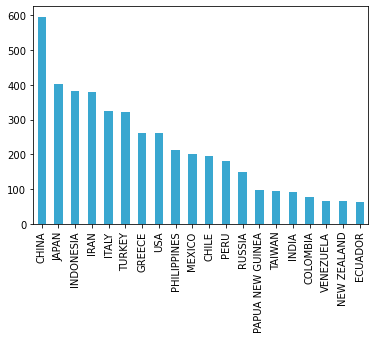

In [440]:
country_vals[:20].plot(kind="bar",
                  color = sns.color_palette("husl", 8)[5])

In [393]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [441]:
df_dropped['LATITUDE']

16      38.900
32      35.400
36      45.200
43      32.000
57      33.000
         ...  
6099    14.924
6100    -6.977
6101    -4.081
6102    45.205
6104    -5.796
Name: LATITUDE, Length: 3181, dtype: object

In [442]:
gdf = gpd.GeoDataFrame(df_geo, geometry=[Point(xy) for xy in zip(df_geo['LONGITUDE'],df_geo['LATITUDE'])])

<AxesSubplot:>

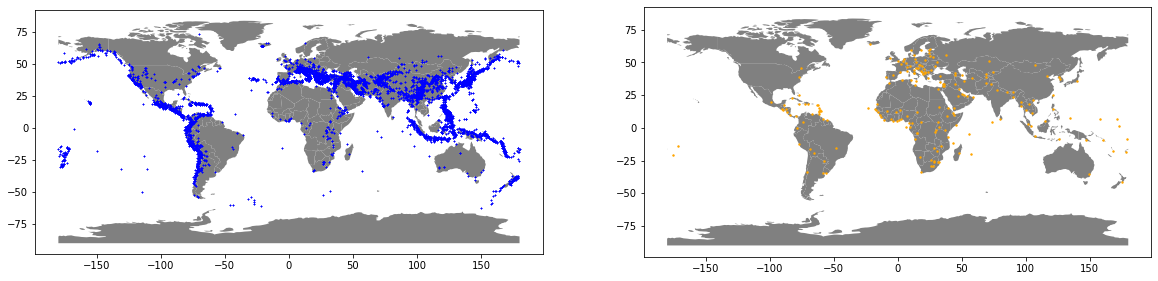

In [443]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
f, axes = plt.subplots(figsize=(20, 10), ncols=2)
world.plot(ax=axes[0], color='grey')
gdf.plot(ax=axes[0],  color='blue', markersize = 1, marker='x')
world.plot(ax=axes[1], color='grey')
gpd.read_file(gpd.datasets.get_path('naturalearth_cities')).plot(ax=axes[1], color='orange', markersize = 2)

In [444]:
#geometry = geopandas.points_from_xy(df_dropped.LONGITUDE, df_dropped.LATITUDE)
geometry = [Point(xy) for xy in zip(df_geo['LONGITUDE'],df_geo['LATITUDE'])]
geo_df = gpd.GeoDataFrame(df_geo, geometry=geometry)

Text(0.5, 1.0, 'Earthquakes')

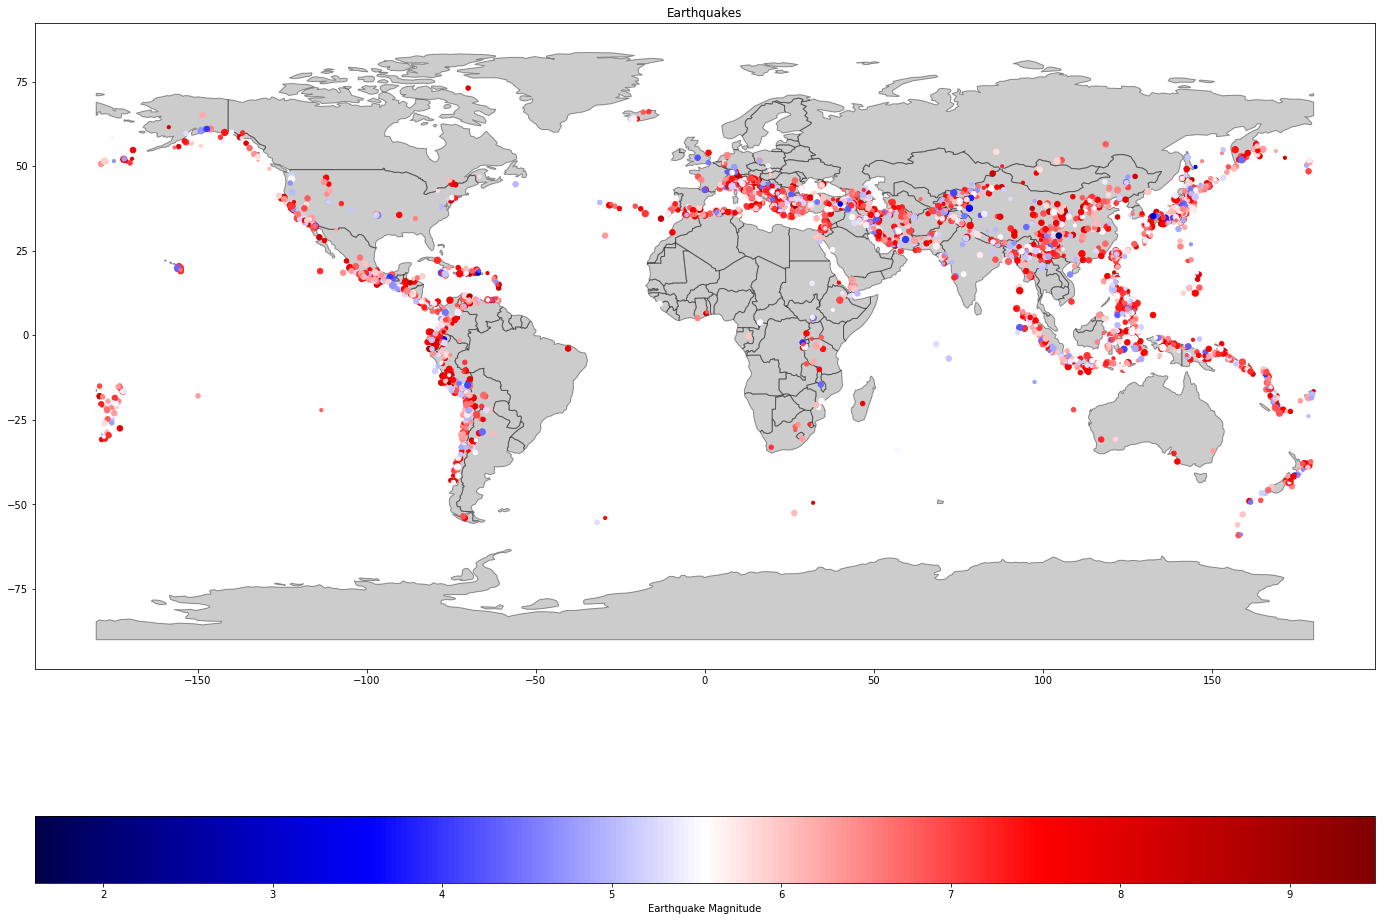

In [445]:
markersize= geo_df['DAMAGE_DESCRIPTION'] * 10
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(24,18))
world.plot(ax=ax, alpha=0.4, color='grey', edgecolor='black')
geo_df.plot(column='EQ_PRIMARY', ax=ax, legend=True, cmap='seismic',
            markersize = markersize, #20, #marker='x',
            legend_kwds={'label': "Earthquake Magnitude",
                         'orientation': "horizontal"})
plt.title('Earthquakes')

Text(0.5, 1.0, 'Earthquakes')

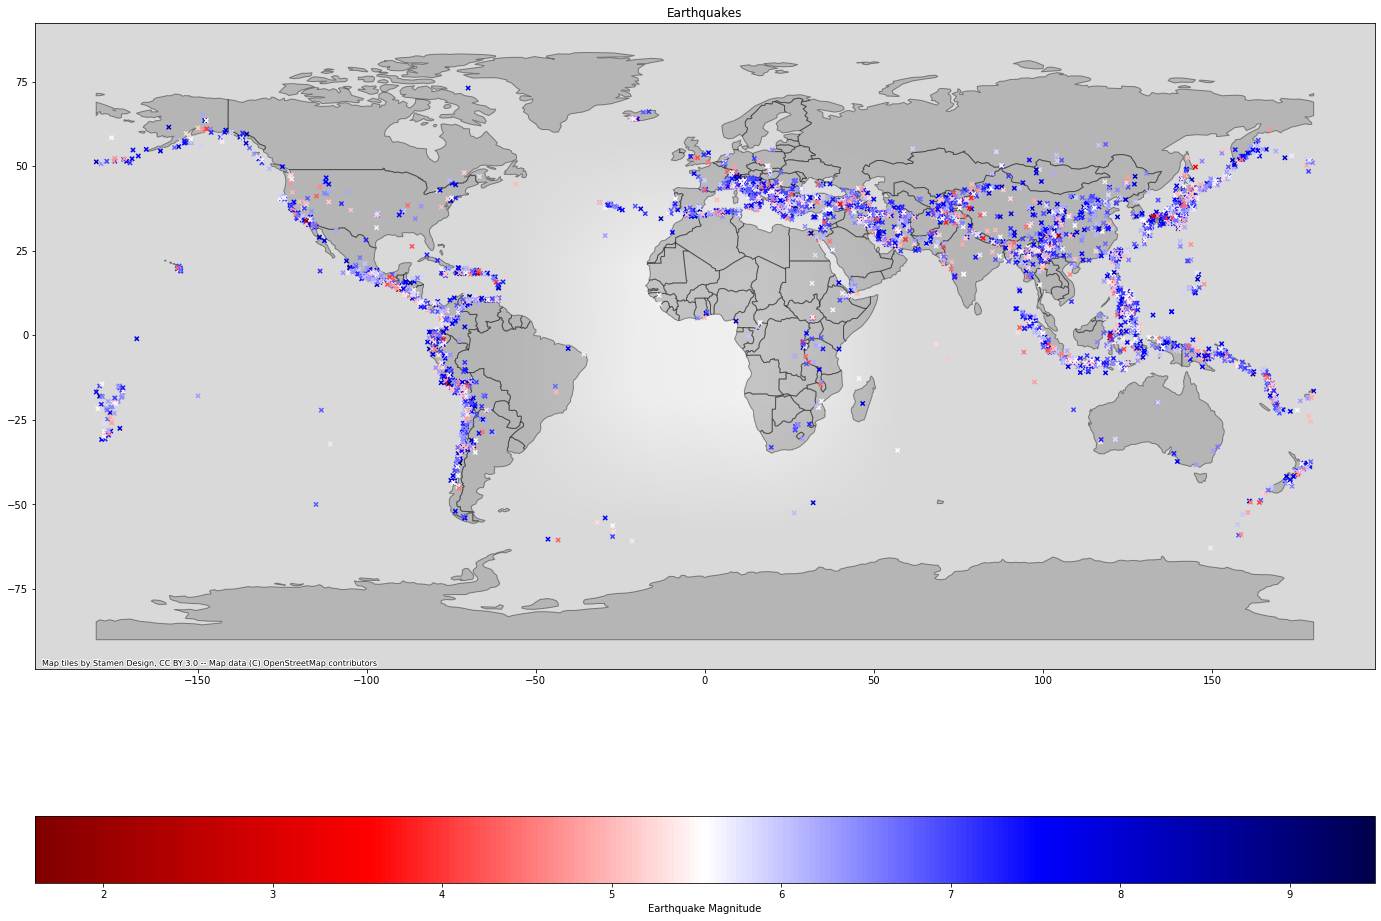

In [482]:
fig, ax = plt.subplots(figsize=(24,18))
world.plot(ax=ax, alpha=0.4, color='grey', edgecolor='black')
cx.add_basemap(ax, crs=geo_df.crs, zoom=12, source=cx.providers.Stamen.TonerLite)
#cx.add_basemap(ax, crs=geo_df.crs, zoom=12, source=cx.providers.Stamen.TonerBackground)
geo_df.plot(column='EQ_PRIMARY', ax=ax, legend=True, cmap='seismic_r',
            markersize = 18, marker='x',
            legend_kwds={'label': "Earthquake Magnitude",
                         'orientation': "horizontal"})

plt.title('Earthquakes')

In [458]:
world.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [449]:
import plotly.express as px
import pandas as pd

fig = px.scatter_geo(geo_df, lat='LATITUDE', lon='LONGITUDE', hover_name="EQ_PRIMARY")
fig.update_layout(title = 'Earthquakes', title_x=0.5)
fig.show()
